In [1]:
import sys
import os
import warnings
warnings.filterwarnings('ignore')

work_path = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(work_path)

from hossam.util import *
from hossam.plot import *
from hossam.timeserise import *
from yjk_module.preprocessing import *
from yjk_module.ml_module import *

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import dates
import datetime as dt

In [2]:
origin = pd.read_excel("./data/air_passengers.xlsx", index_col = "Month")

=========== 원본 데이터 ===========


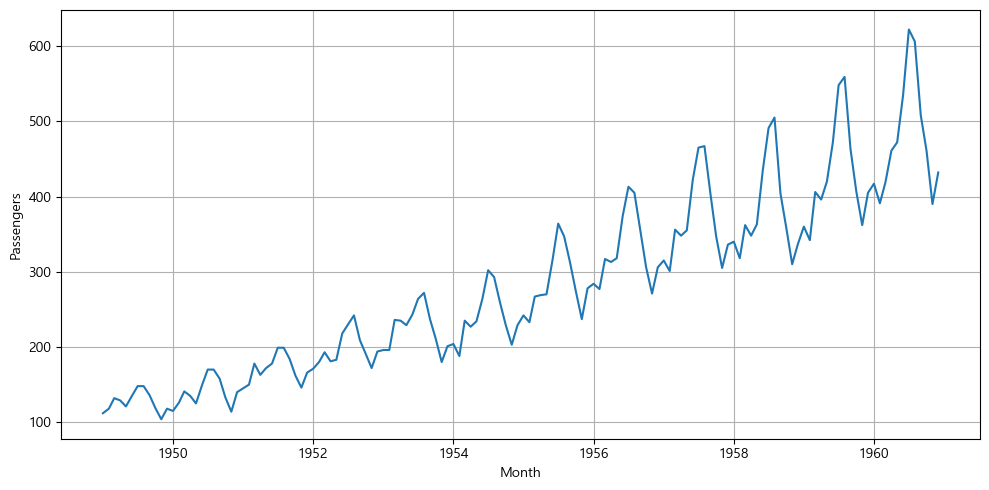

+----------------------------------+---------------------+
|                                  | ADF Test            |
|----------------------------------+---------------------|
| 검정통계량(ADF Statistic)        | 0.8153688792060597  |
| 유의수준(p-value)                | 0.9918802434376411  |
| 최적차수(num of lags)            | 13                  |
| 관측치 개수(num of observations) | 130                 |
| 기각값(Critical Values) 1%       | -3.4816817173418295 |
| 기각값(Critical Values) 5%       | -2.8840418343195267 |
| 기각값(Critical Values) 10%      | -2.578770059171598  |
| 데이터 정상성 여부               | 비정상              |
+----------------------------------+---------------------+
=========== 1차 차분 데이터 ===========


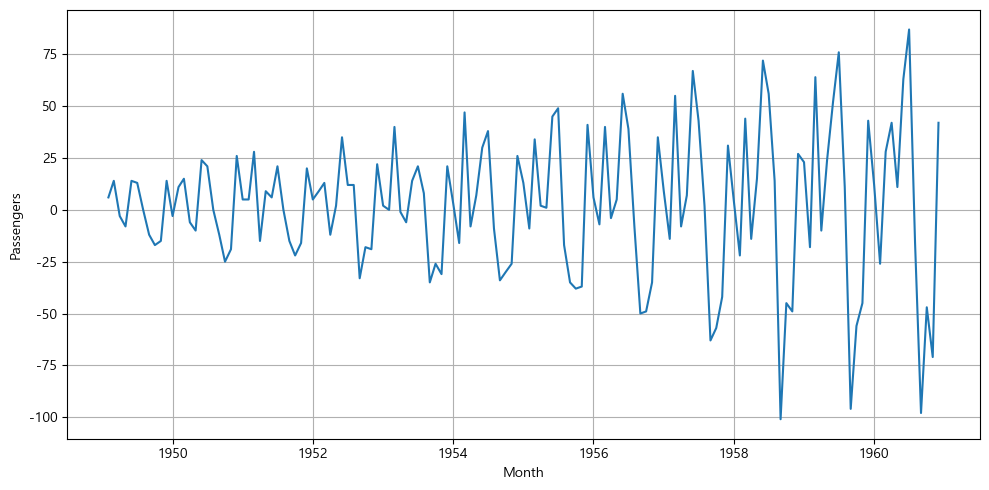

+----------------------------------+---------------------+
|                                  | ADF Test            |
|----------------------------------+---------------------|
| 검정통계량(ADF Statistic)        | -2.829266824169992  |
| 유의수준(p-value)                | 0.0542132902838265  |
| 최적차수(num of lags)            | 12                  |
| 관측치 개수(num of observations) | 130                 |
| 기각값(Critical Values) 1%       | -3.4816817173418295 |
| 기각값(Critical Values) 5%       | -2.8840418343195267 |
| 기각값(Critical Values) 10%      | -2.578770059171598  |
| 데이터 정상성 여부               | 비정상              |
+----------------------------------+---------------------+
=========== 2차 차분 데이터 ===========


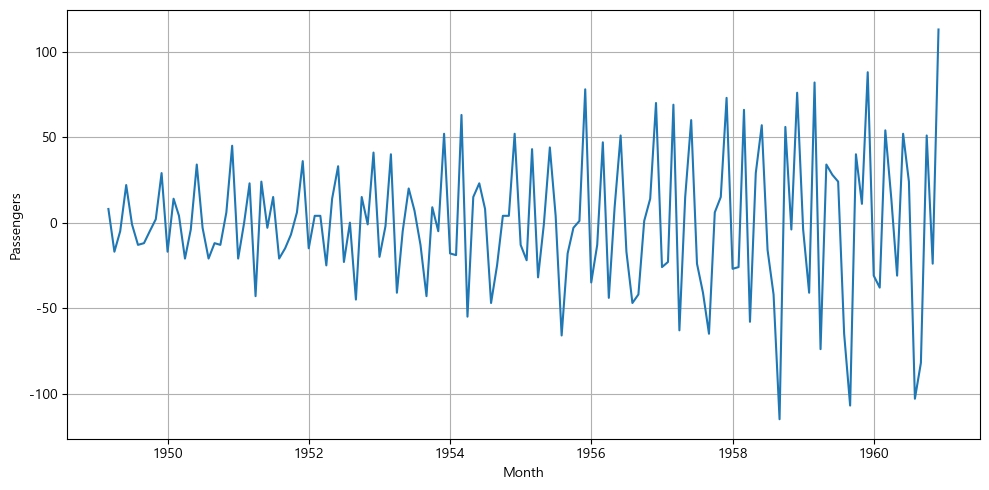

+----------------------------------+-----------------------+
|                                  | ADF Test              |
|----------------------------------+-----------------------|
| 검정통계량(ADF Statistic)        | -16.384231542468527   |
| 유의수준(p-value)                | 2.732891850014085e-29 |
| 최적차수(num of lags)            | 11                    |
| 관측치 개수(num of observations) | 130                   |
| 기각값(Critical Values) 1%       | -3.4816817173418295   |
| 기각값(Critical Values) 5%       | -2.8840418343195267   |
| 기각값(Critical Values) 10%      | -2.578770059171598    |
| 데이터 정상성 여부               | 정상                  |
+----------------------------------+-----------------------+
+---------------------+--------------+
| Month               |   Passengers |
|---------------------+--------------|
| 1949-03-01 00:00:00 |            8 |
| 1949-04-01 00:00:00 |          -17 |
| 1949-05-01 00:00:00 |           -5 |
| 1949-06-01 00:00:00 |           22 |
| 1949-07-01 00:00:00 |         

In [3]:
diff_df = my_diff(origin, 'Passengers')
my_pretty_table(diff_df.head())

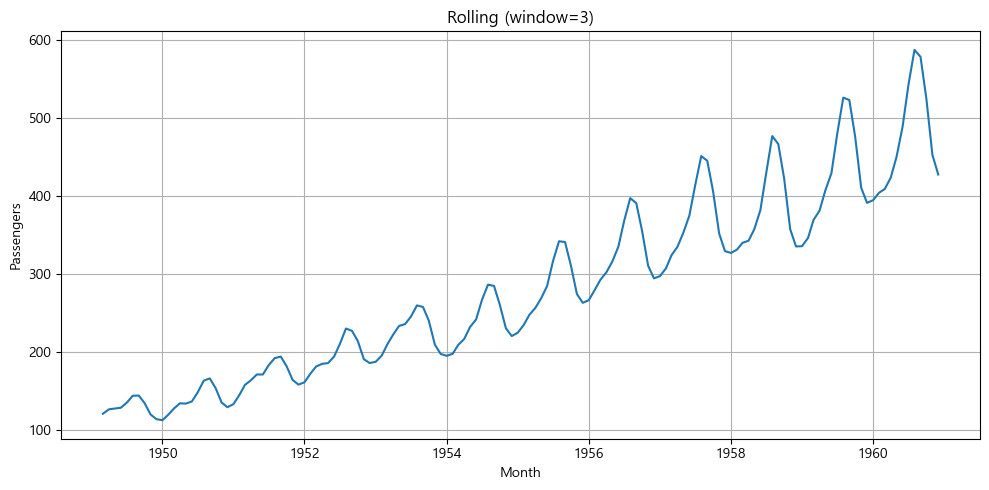

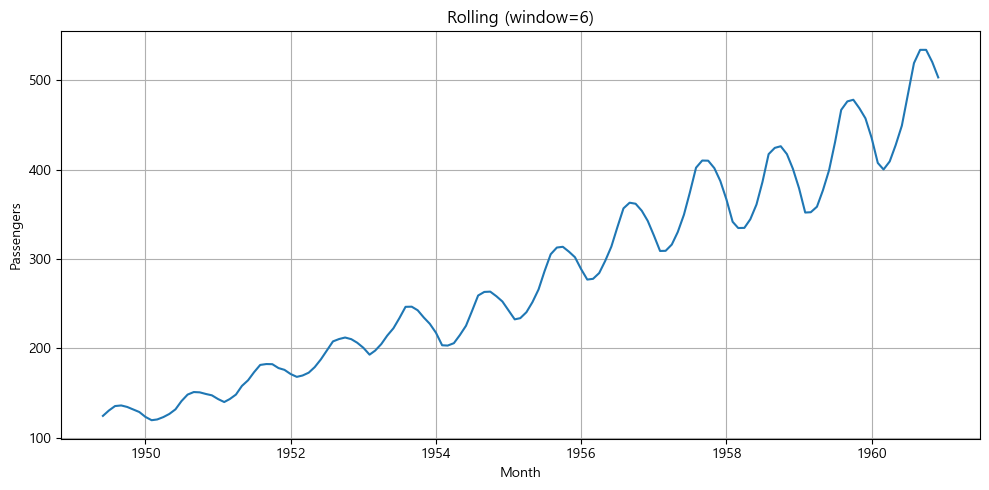

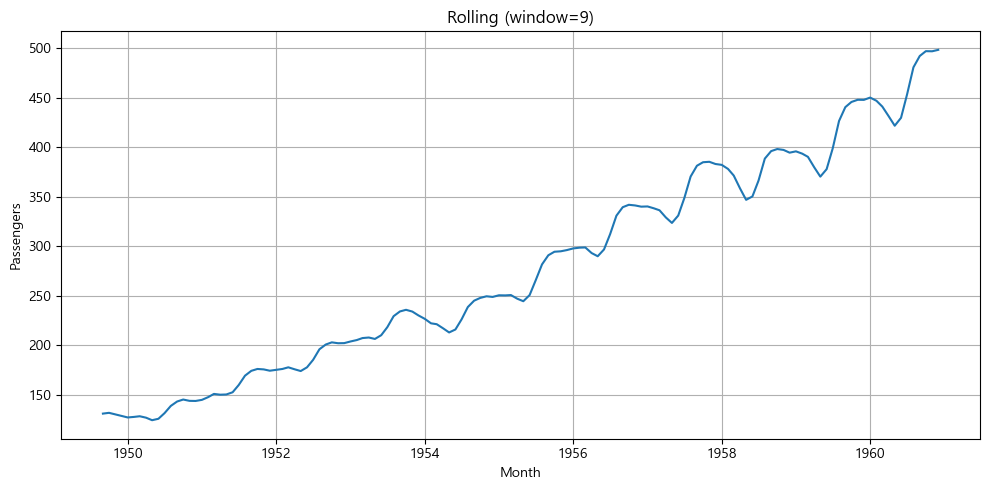

In [4]:
month3 = my_rolling(origin['Passengers'], window=3)
month6 = my_rolling(origin['Passengers'], window=6)
month9 = my_rolling(origin['Passengers'], window=9)

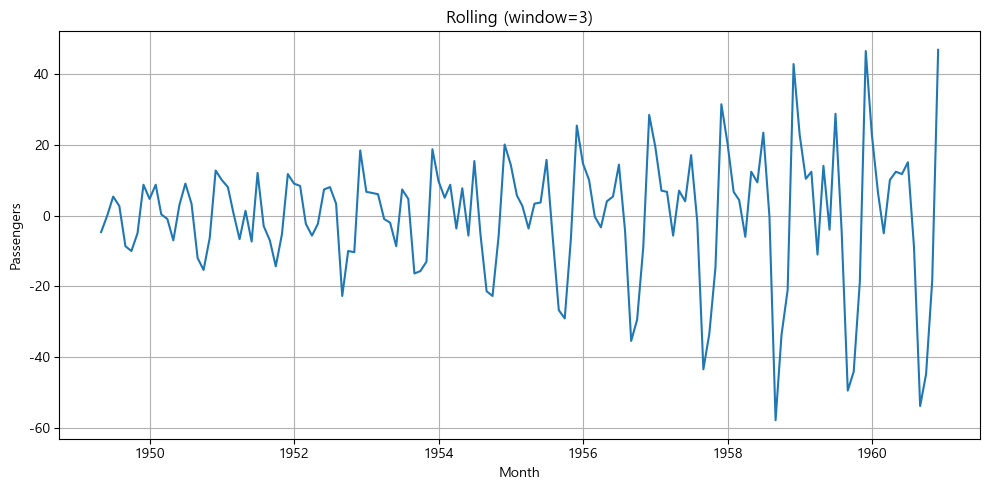

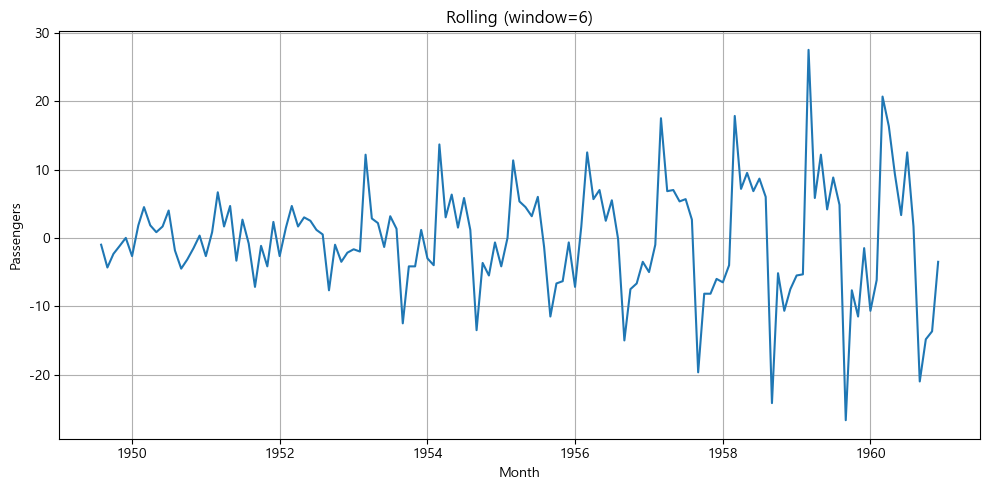

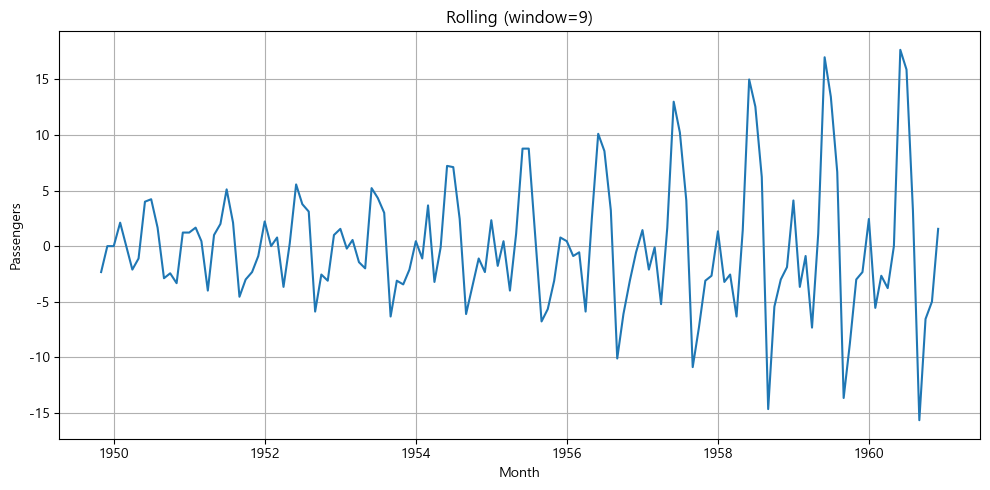

In [5]:
month3 = my_rolling(diff_df['Passengers'], window=3)
month6 = my_rolling(diff_df['Passengers'], window=6)
month9 = my_rolling(diff_df['Passengers'], window=9)

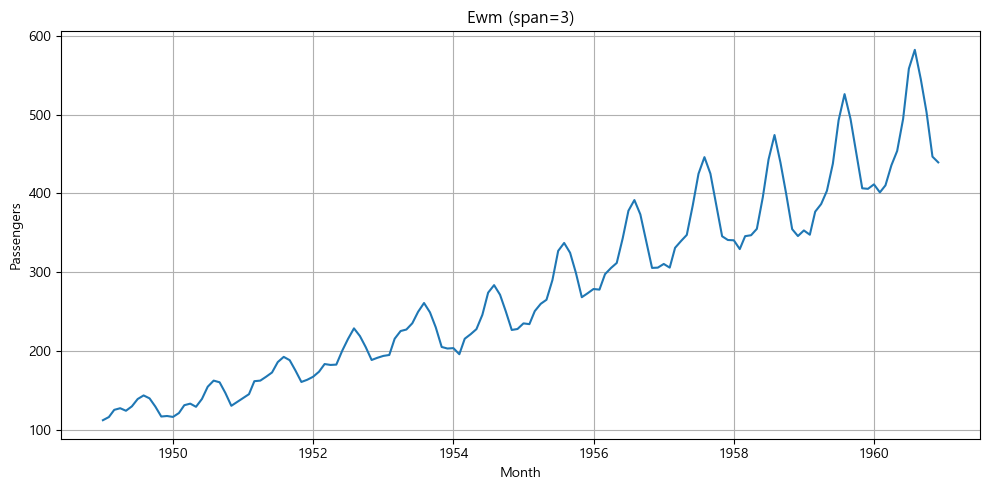

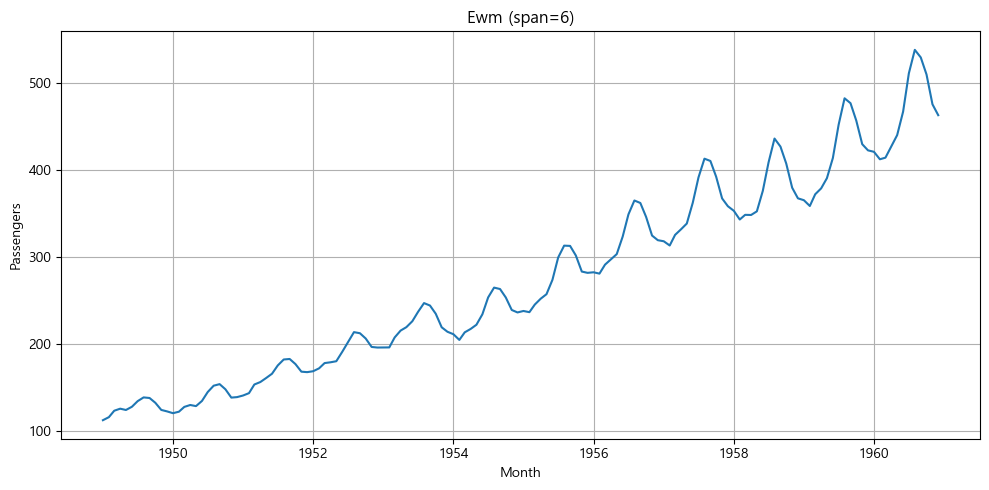

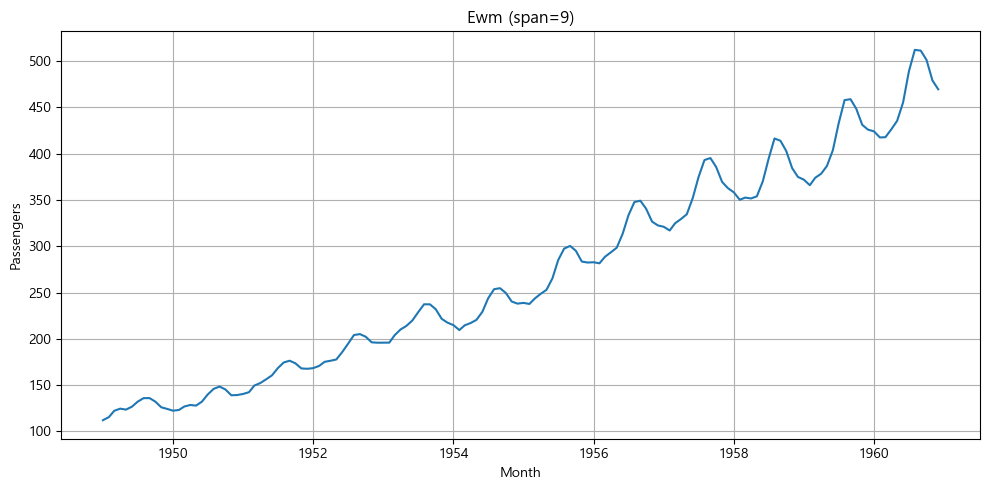

In [6]:
ewm3 = my_ewm(origin['Passengers'], span=3)
ewm6 = my_ewm(origin['Passengers'], span=6)
ewm9 = my_ewm(origin['Passengers'], span=9)

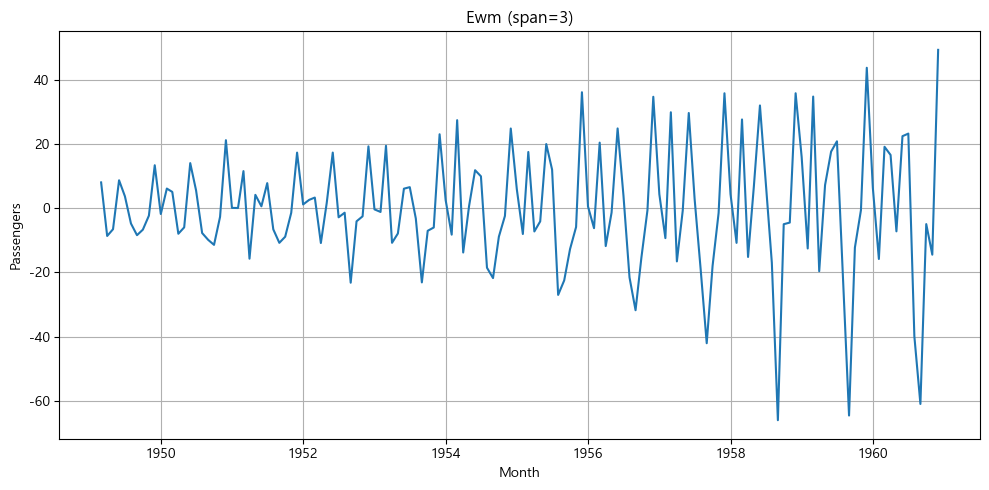

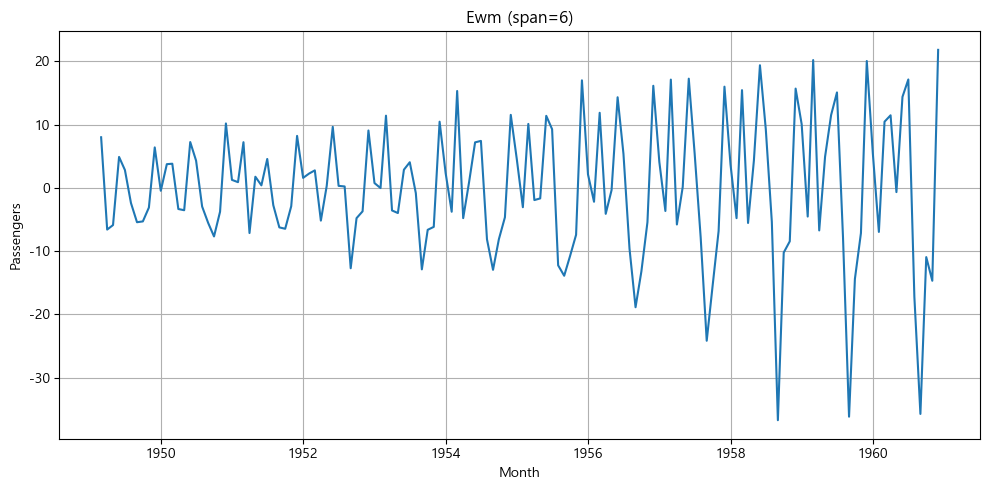

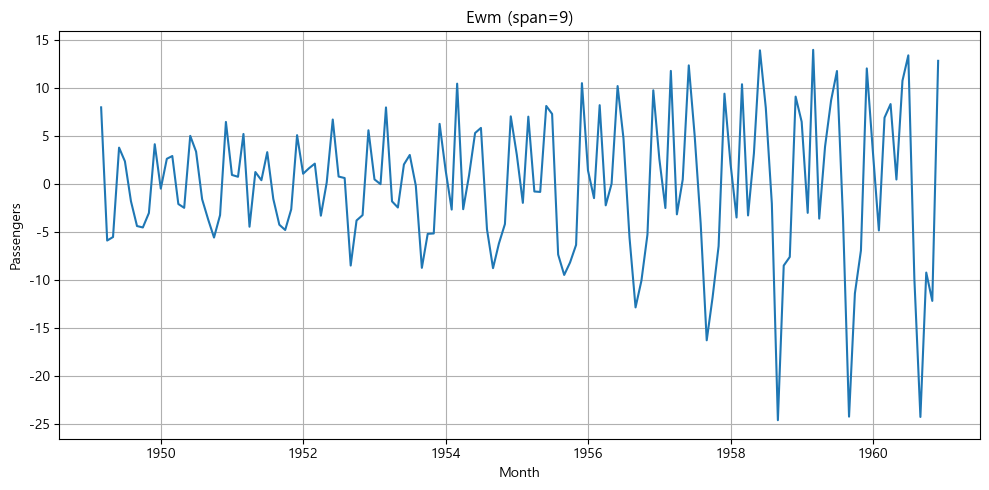

In [7]:
ewm3 = my_ewm(diff_df['Passengers'], span=3)
ewm6 = my_ewm(diff_df['Passengers'], span=6)
ewm9 = my_ewm(diff_df['Passengers'], span=9)

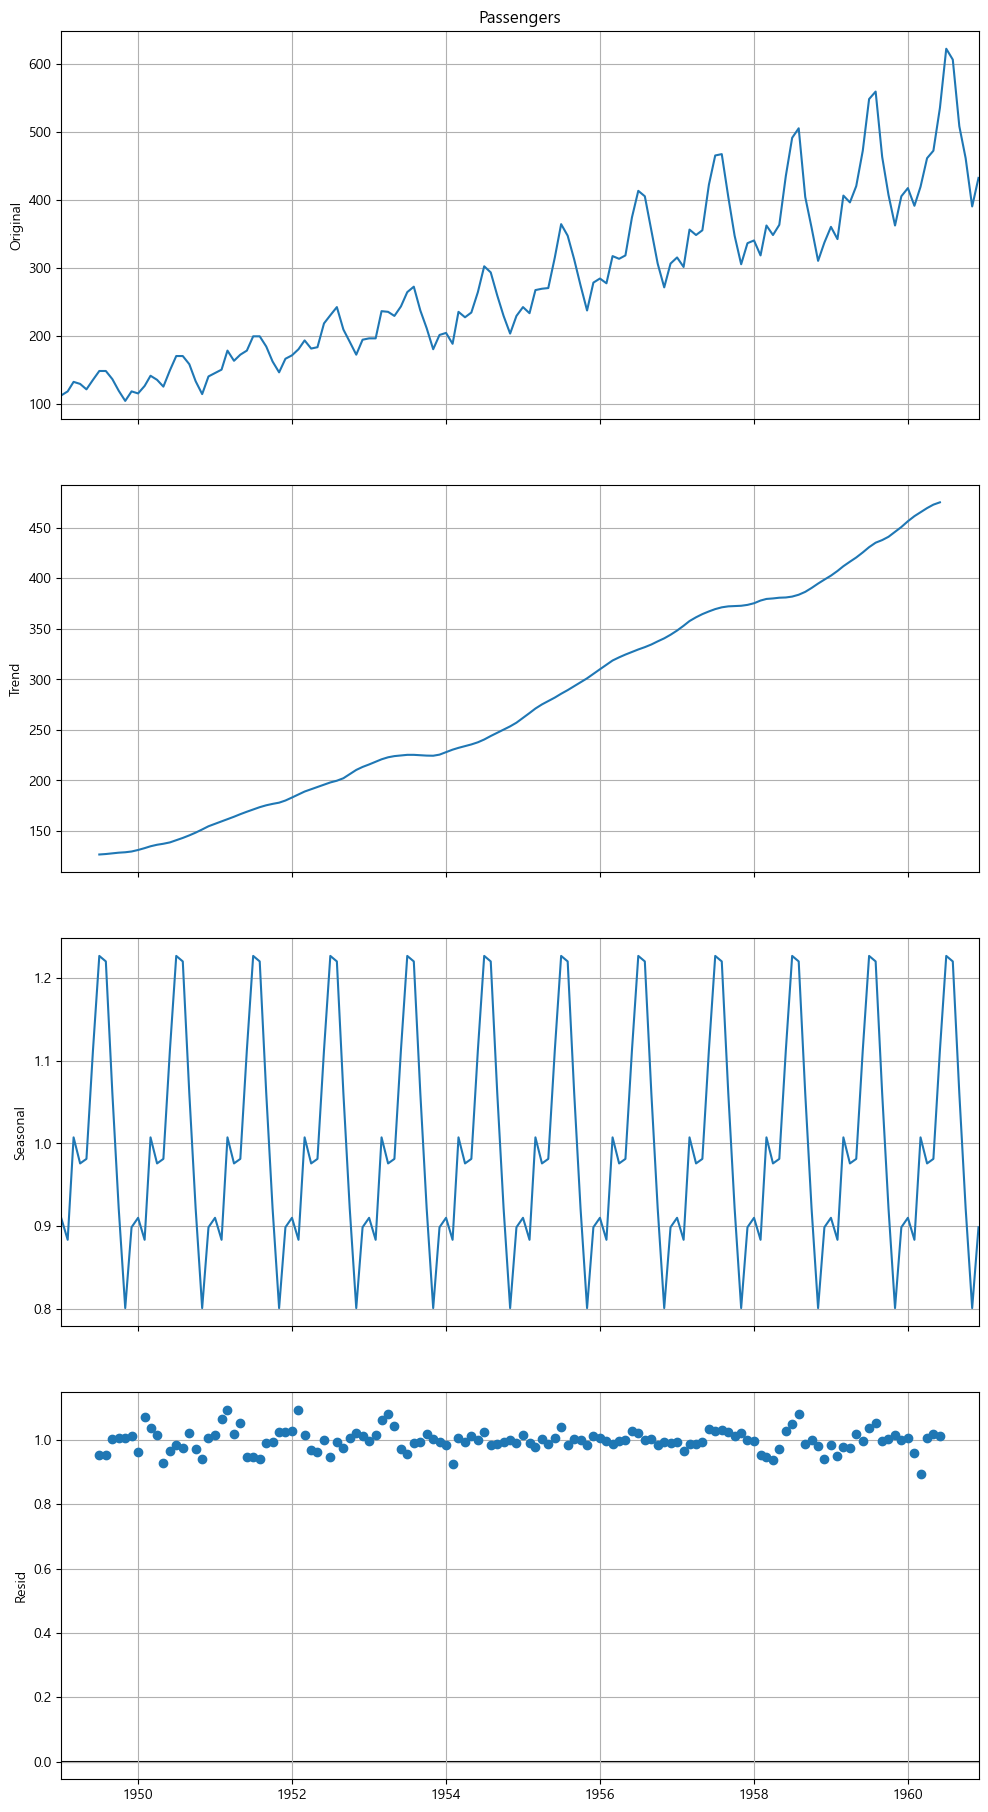

+---------------------+------------+---------+------------+----------+
| Month               |   original |   trend |   seasonal |    resid |
|---------------------+------------+---------+------------+----------|
| 1949-01-01 00:00:00 |        112 |     nan |    0.91023 |      nan |
| 1949-02-01 00:00:00 |        118 |     nan |   0.883625 |      nan |
| 1949-03-01 00:00:00 |        132 |     nan |    1.00737 |      nan |
| 1949-04-01 00:00:00 |        129 |     nan |   0.975906 |      nan |
| 1949-05-01 00:00:00 |        121 |     nan |   0.981378 |      nan |
| 1949-06-01 00:00:00 |        135 |     nan |    1.11278 |      nan |
| 1949-07-01 00:00:00 |        148 | 126.792 |    1.22656 | 0.951664 |
| 1949-08-01 00:00:00 |        148 |  127.25 |    1.21991 | 0.953401 |
| 1949-09-01 00:00:00 |        136 | 127.958 |    1.06049 |  1.00222 |
| 1949-10-01 00:00:00 |        119 | 128.583 |   0.921757 |  1.00403 |
| 1949-11-01 00:00:00 |        104 |     129 |   0.801178 |  1.00627 |
| 1949

In [8]:
sd = my_seasonal_decompose(origin['Passengers'], model="multiplicative")
my_pretty_table(sd)

- ACF, PACF 검정

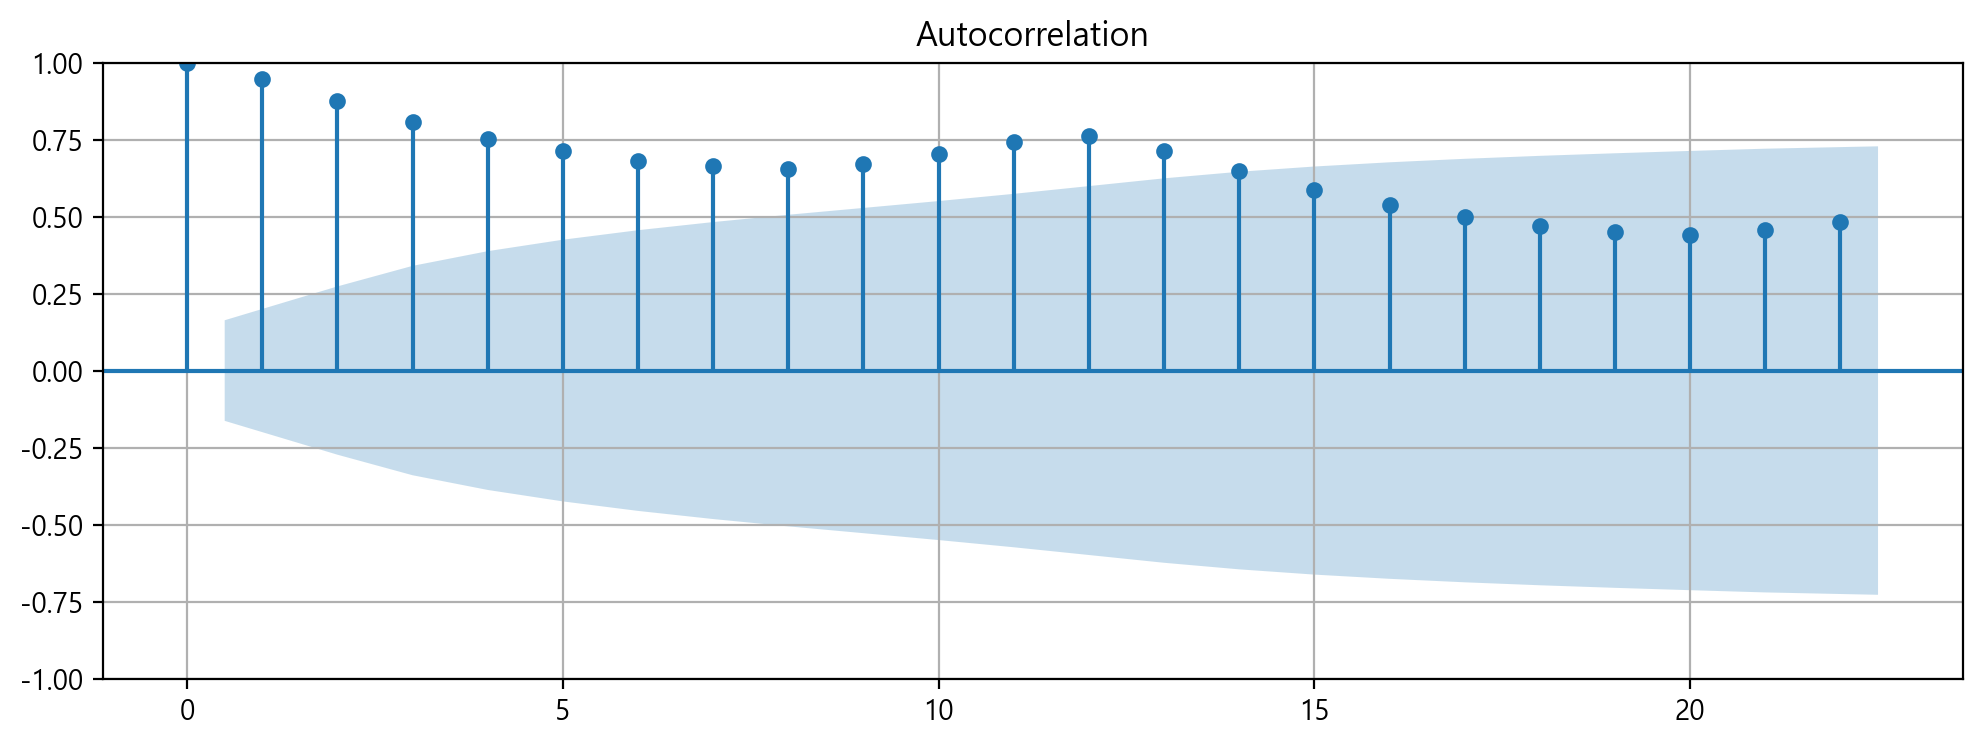

In [9]:
fig = plt.figure(figsize = (12, 4))
ax = fig.gca()

plot_acf(x = origin['Passengers'], ax = ax)
ax.grid()
plt.show()
plt.close()

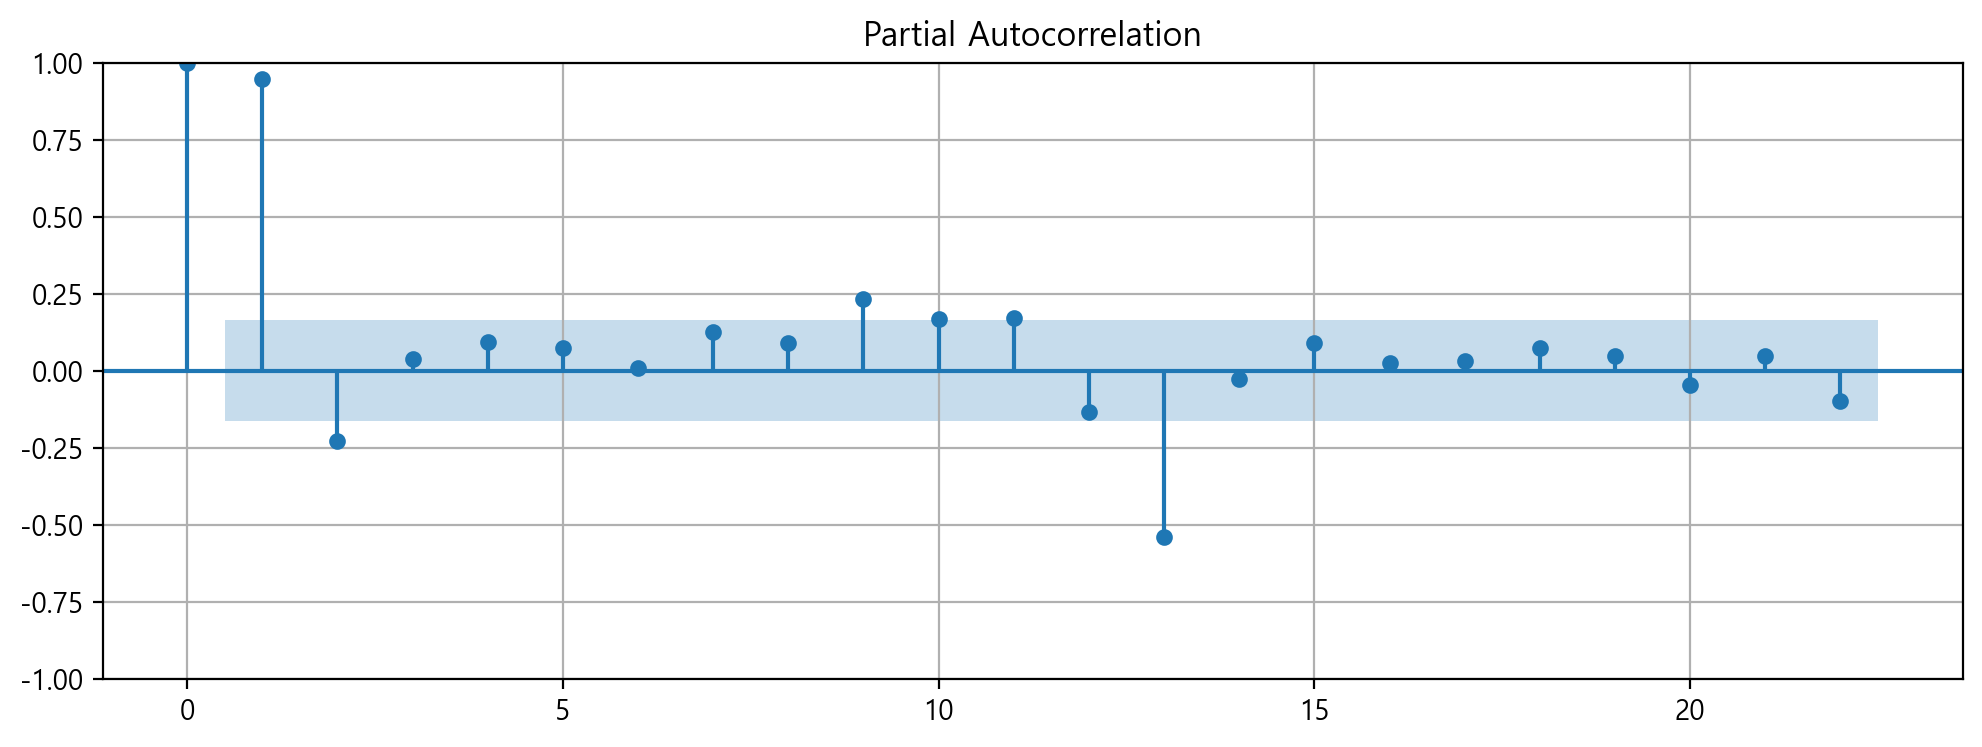

In [10]:
fig = plt.figure(figsize = (12, 4))
ax = fig.gca()

plot_pacf(x = origin['Passengers'], ax = ax)
ax.grid()
plt.show()
plt.close()

- ARIMA 분석
    - ARIMA(p, d, q)(P, D, Q, s) 값 입력
        - s : 계절주기, 분석가가 직접 찾아야 함

In [11]:
# 기본 코드
# model = ARIMA(origin['Passengers'], order = (1, 0, 0))

# 계절성 고려 (원본은 월단위이며 1년 단위 주기가 있으므로 주기를 12로 설정, 분석가의 주관적 판단에 의함)
model = ARIMA(origin['Passengers'], seasonal_order = (1, 0, 0, 12))

fit = model.fit()
print(fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:             ARIMA(1, 0, 0, 12)   Log Likelihood                -739.888
Date:                Tue, 12 Mar 2024   AIC                           1485.776
Time:                        15:07:20   BIC                           1494.686
Sample:                    01-01-1949   HQIC                          1489.396
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        298.8789     46.924      6.369      0.000     206.910     390.847
ar.S.L12       0.9773      0.033     29.584      0.000       0.913       1.042
sigma2      1312.3966    296.814      4.422      0.0

- 예측값 생성

In [12]:
start_index = 0
end_index = len(origin['Passengers'])
Pd = fit.predict(start = start_index, end = end_index)
Pd

1949-01-01    298.878858
1949-02-01    298.878858
1949-03-01    298.878858
1949-04-01    298.878858
1949-05-01    298.878858
                 ...    
1960-09-01    459.278504
1960-10-01    404.548321
1960-11-01    360.568709
1960-12-01    402.593671
1961-01-01    414.321568
Freq: MS, Name: predicted_mean, Length: 145, dtype: float64

- 이후 1년간 예측값

In [13]:
fc = fit.forecast(12)
fc

1961-01-01    414.321568
1961-02-01    388.911126
1961-03-01    416.276217
1961-04-01    457.323855
1961-05-01    468.074426
1961-06-01    529.645882
1961-07-01    614.673131
1961-08-01    599.035936
1961-09-01    503.258116
1961-10-01    457.323855
1961-11-01    387.933801
1961-12-01    428.981438
Freq: MS, Name: predicted_mean, dtype: float64

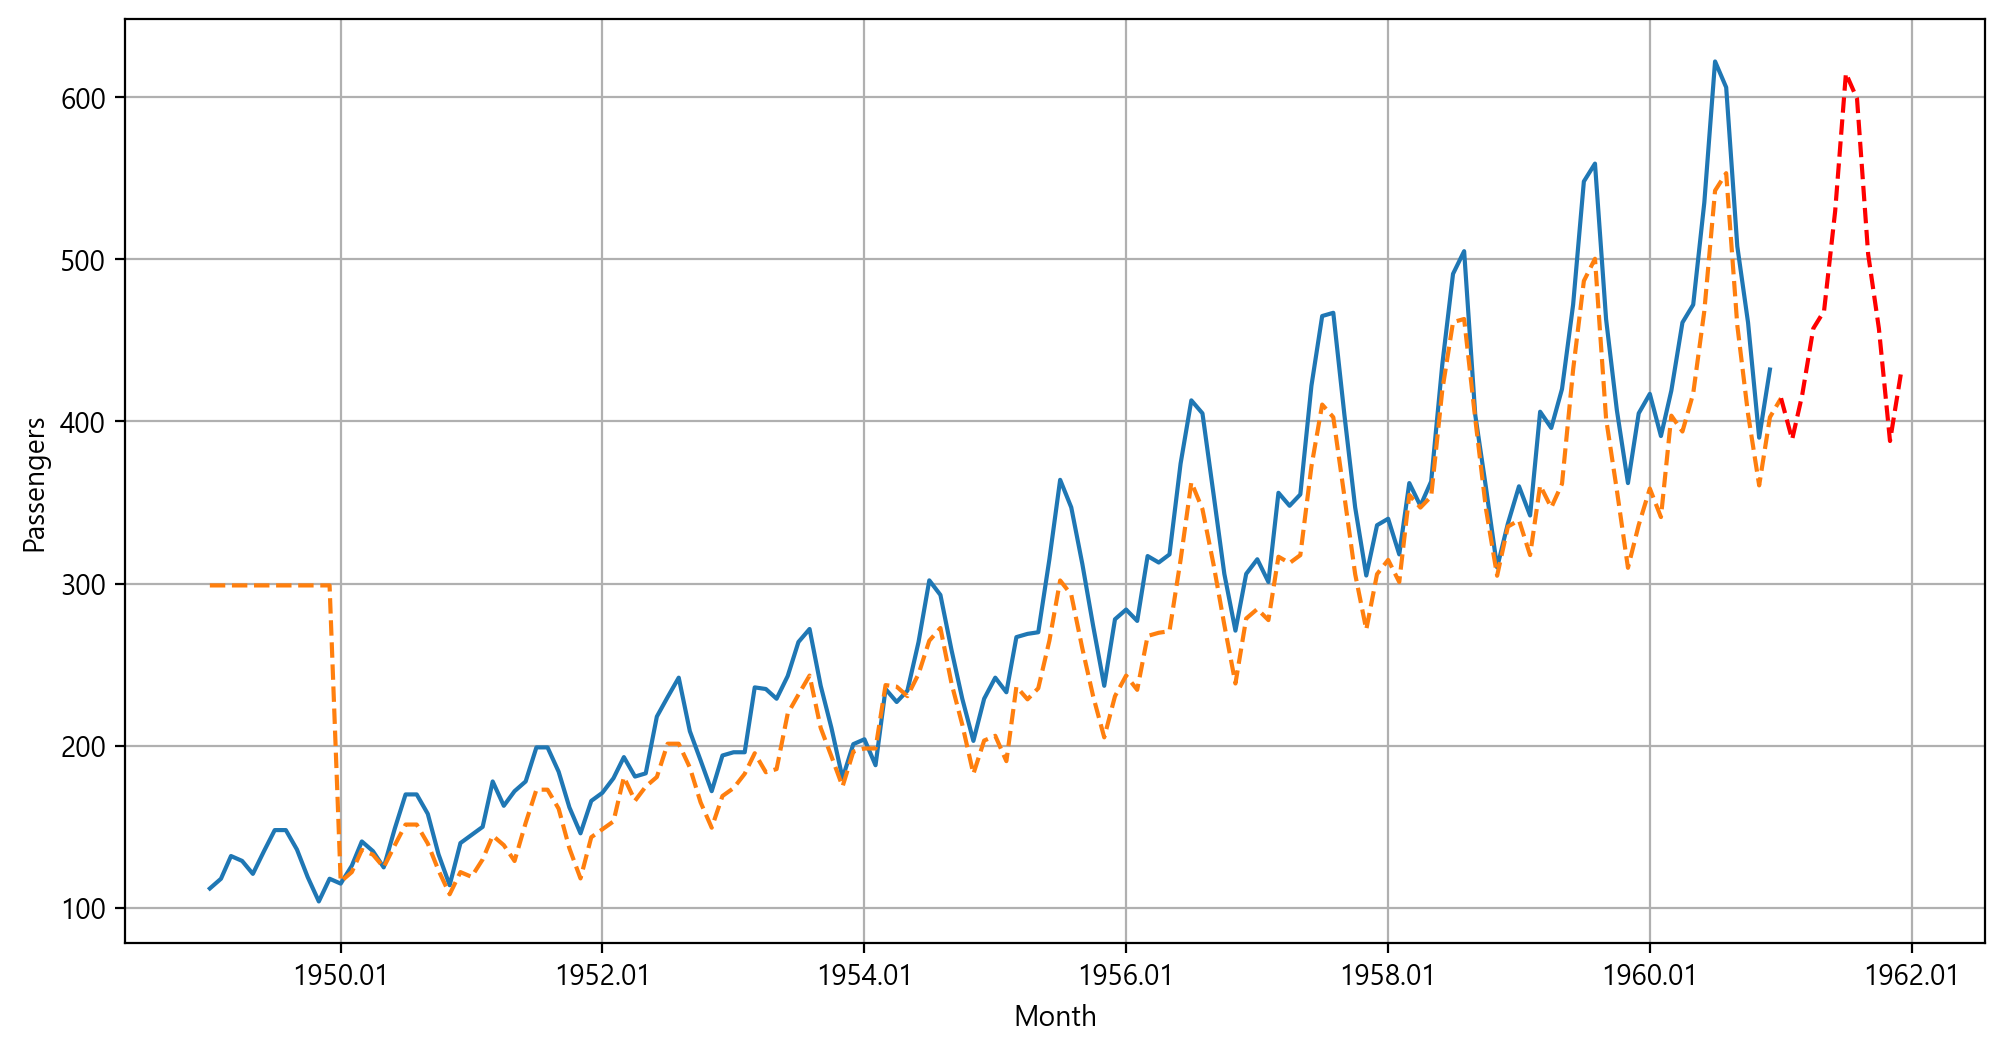

In [14]:
fig = plt.figure(figsize = (12, 6))
ax = fig.gca()

# 원본
sb.lineplot(x = origin.index, y = origin['Passengers'], ax = ax)

# 훈련모델의 예측값 (원본 범위)
sb.lineplot(x = Pd.index, y = Pd, linestyle = '--', ax = ax)

# 훈련모델의 예측값 (1년 후)
sb.lineplot(x = fc.index, y = fc, linestyle = '--', ax = ax, color = 'red')

ax.set_xlabel('Month')
ax.set_ylabel('Passengers')
ax.grid()

monthyearFmt = dates.DateFormatter("%Y.%m")
ax.xaxis.set_major_formatter(monthyearFmt)

plt.show()

In [15]:
from pmdarima.arima import auto_arima

In [16]:
df = origin.copy()
df.index = pd.DatetimeIndex(df.index)

In [17]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

- auto_arima : 훈련과 검증데이터 분리
    - 시계열 데이터는 슬라이싱 활용

In [18]:
train = df[:int(0.7*len(df))]
test = df[int(0.7*len(df)):]

In [19]:
train.head()

Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

In [20]:
test.head()

Passengers
Month                 
1957-05-01         355
1957-06-01         422
1957-07-01         465
1957-08-01         467
1957-09-01         404

In [21]:
my_p = 3
my_d = 2
my_q = 3
my_s = 12

In [22]:
model = auto_arima(y = train, start_p = 0, max_p = my_p, d = my_d, start_q = 0, max_q = my_q, seasonal = True,
                  m = my_s, start_P = 0, max_P = my_p, D = my_d, start_Q = 0, max_Q = my_q, trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,2,0)[12]             : AIC=700.560, Time=0.08 sec
 ARIMA(1,2,0)(1,2,0)[12]             : AIC=628.108, Time=0.23 sec
 ARIMA(0,2,1)(0,2,1)[12]             : AIC=inf, Time=0.34 sec
 ARIMA(1,2,0)(0,2,0)[12]             : AIC=656.611, Time=0.05 sec
 ARIMA(1,2,0)(2,2,0)[12]             : AIC=618.256, Time=0.70 sec
 ARIMA(1,2,0)(3,2,0)[12]             : AIC=614.066, Time=1.04 sec
 ARIMA(1,2,0)(3,2,1)[12]             : AIC=inf, Time=5.55 sec
 ARIMA(1,2,0)(2,2,1)[12]             : AIC=inf, Time=4.19 sec
 ARIMA(0,2,0)(3,2,0)[12]             : AIC=652.212, Time=1.17 sec
 ARIMA(2,2,0)(3,2,0)[12]             : AIC=606.557, Time=4.52 sec
 ARIMA(2,2,0)(2,2,0)[12]             : AIC=612.571, Time=1.10 sec
 ARIMA(2,2,0)(3,2,1)[12]             : AIC=inf, Time=14.19 sec
 ARIMA(2,2,0)(2,2,1)[12]             : AIC=inf, Time=5.24 sec
 ARIMA(3,2,0)(3,2,0)[12]             : AIC=604.074, Time=5.30 sec
 ARIMA(3,2,0)(2,2,0)[12]             : AIC=607.624, 

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  100
Model:             SARIMAX(3, 2, 0)x(3, 2, 0, 12)   Log Likelihood                -295.037
Date:                            Tue, 12 Mar 2024   AIC                            604.074
Time:                                    15:09:02   BIC                            620.203
Sample:                                01-01-1949   HQIC                           610.508
                                     - 04-01-1957                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9835      0.123     -7.989      0.000      -1.225      -0.742
ar.L2         -0.5755      0.171     -3.356      0.001      -0.912      -0.239
ar.L3         -0.2544      0.142     -1.786      0.074      -0.534       0.025
ar.S.L12      -1.0755      0.125     -8.611      0.000      -1.320      -0.831
ar.S.L24      -0.7788      0.172     -4.532      0.000      -1.116      -0.442
ar.S.L36      -0.3914      0.187     -2.090      0.037      -0.758      -0.024
sigma2       133.2855     26.116      5.104      0.000      82.099     184.472
===================================================================================
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):                 0.49
Prob(Q):                              0.50   Prob(JB):                         0.78
Heteroskedasticity (H):               0.90   Skew:                            -0.20
Prob(H) (two-sided):                  0.79   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
pred = model.predict(n_periods = int(len(test)) + 12)

In [25]:
pred.head()

1957-05-01    355.463949
1957-06-01    411.566883
1957-07-01    464.386221
1957-08-01    443.121623
1957-09-01    393.594245
Freq: MS, dtype: float64

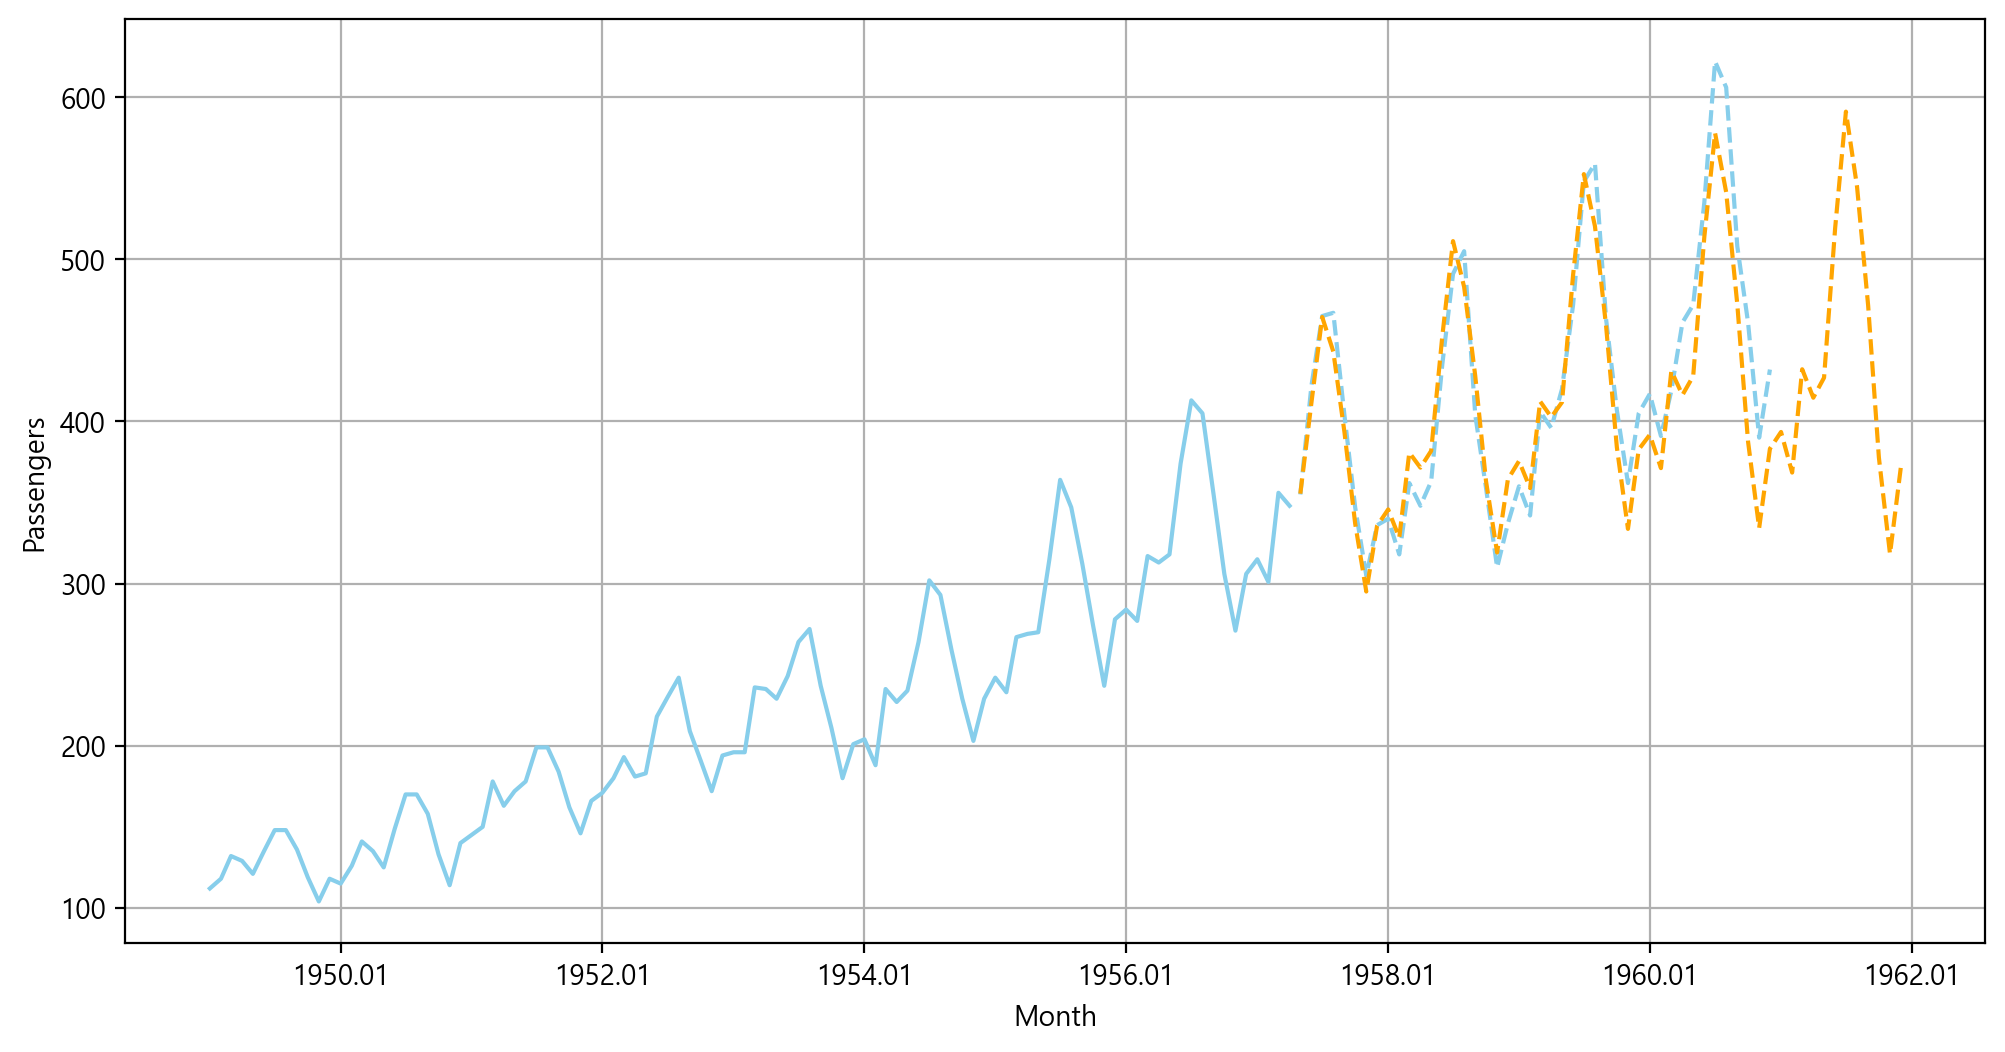

In [26]:
fig = plt.figure(figsize = (12, 6))
ax = fig.gca()

# 원본
sb.lineplot(x = train.index, y = train['Passengers'], ax = ax, color = 'skyblue')

# 훈련모델의 예측값 (원본 범위)
sb.lineplot(x = test.index, y = test['Passengers'], linestyle = '--', ax = ax, color = 'skyblue')

# 훈련모델의 예측값 (1년 후)
sb.lineplot(x = pred.index, y = pred.values, linestyle = '--', ax = ax, color = 'orange')

ax.set_xlabel('Month')
ax.set_ylabel('Passengers')
ax.grid()

monthyearFmt = dates.DateFormatter("%Y.%m")
ax.xaxis.set_major_formatter(monthyearFmt)

plt.show()

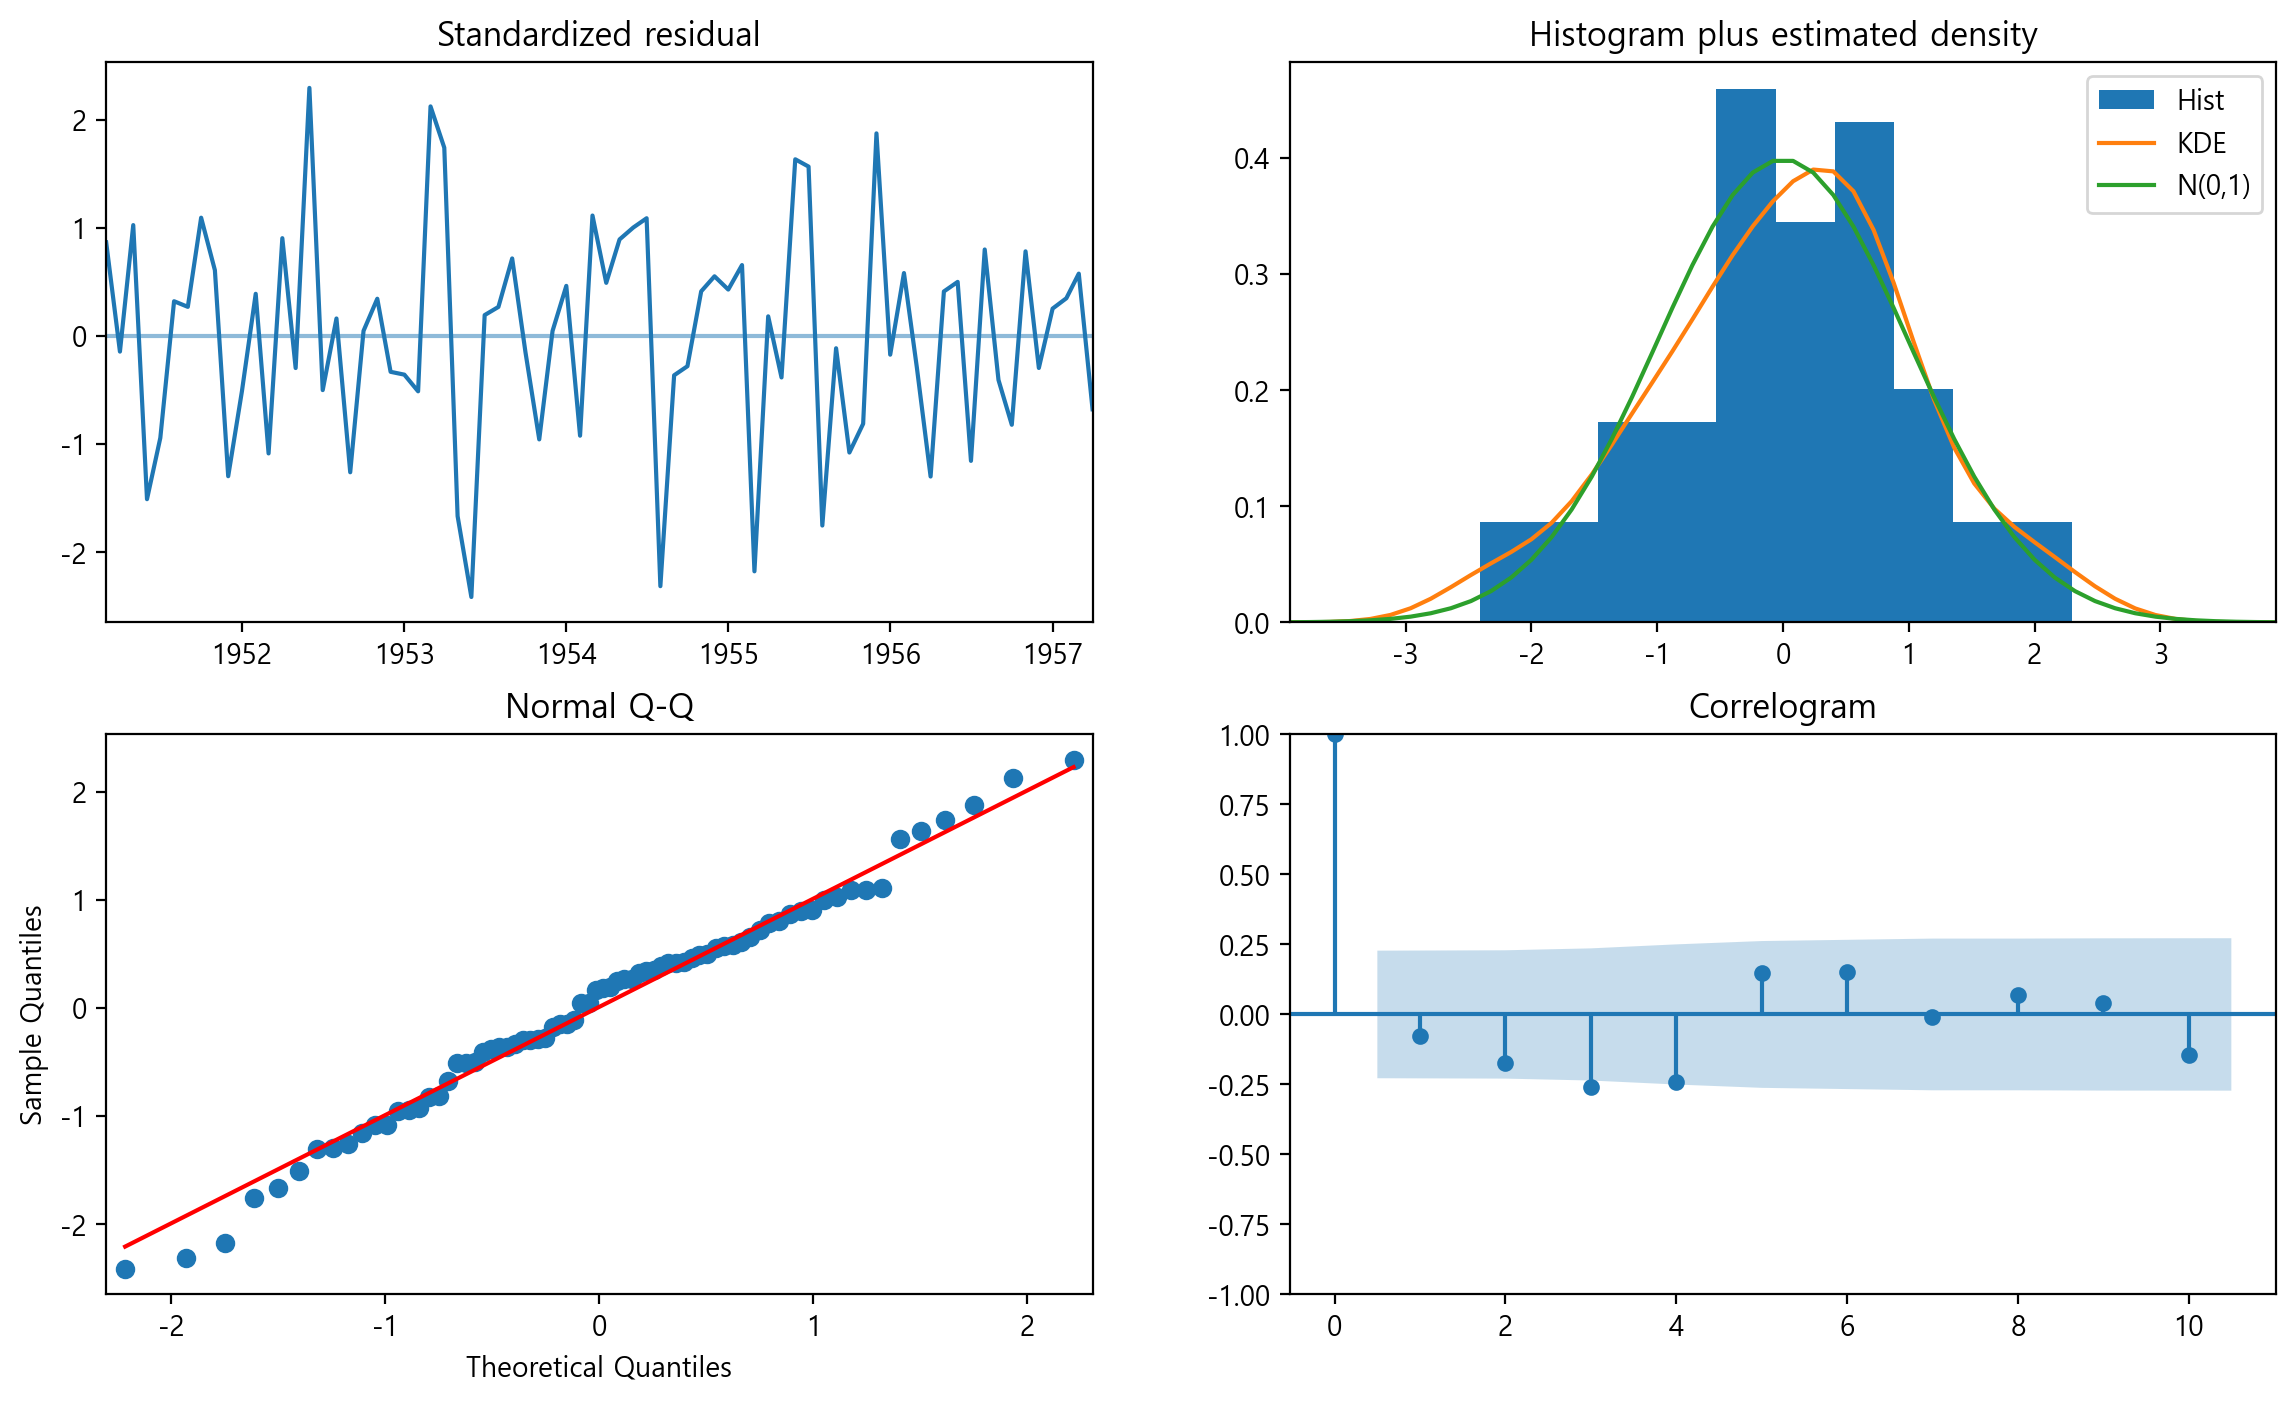

In [27]:
model.plot_diagnostics(figsize = (14, 8))
plt.show()

- 잔차그래프
    - 잔차 오차, 잔차의 밀도분포, QQplot, 상관관계도(ACF 플롯)를 제공

In [28]:
df1 = pd.read_excel("./data/temperatures_seoul.xlsx")

In [29]:
df1

날짜  평균기온(℃)
0     1973-07-01     22.7
1     1973-07-02     23.8
2     1973-07-03     27.2
3     1973-07-04     25.2
4     1973-07-05     26.9
...          ...      ...
18294 2023-08-02     29.7
18295 2023-08-03     29.5
18296 2023-08-04     30.0
18297 2023-08-05     30.3
18298 2023-08-06     29.8

[18299 rows x 2 columns]

In [30]:
df1['월'] = df1['날짜'].apply(lambda x : x.date().month)
df1['년'] = df1['날짜'].apply(lambda x : x.date().year)

In [31]:
df1['년월'] = df1['년'].astype('str') + "-" + df1['월'].astype('str')
df1['년월'] = pd.to_datetime(df1['년월'])

In [32]:
pd.DataFrame(df1.groupby('년월').mean(numeric_only = True)['평균기온(℃)'])

평균기온(℃)
년월                   
1973-07-01  26.816129
1973-08-01  25.883871
1973-09-01  20.323333
1973-10-01  13.038710
1973-11-01   4.723333
...               ...
2023-04-01  13.800000
2023-05-01  19.522581
2023-06-01  23.383333
2023-07-01  26.706452
2023-08-01  29.866667

[602 rows x 1 columns]

In [33]:
df1_2 = pd.DataFrame(df1.groupby('년월').mean(numeric_only = True)['평균기온(℃)'])

In [34]:
df1_2.index = pd.DatetimeIndex(df1_2.index)

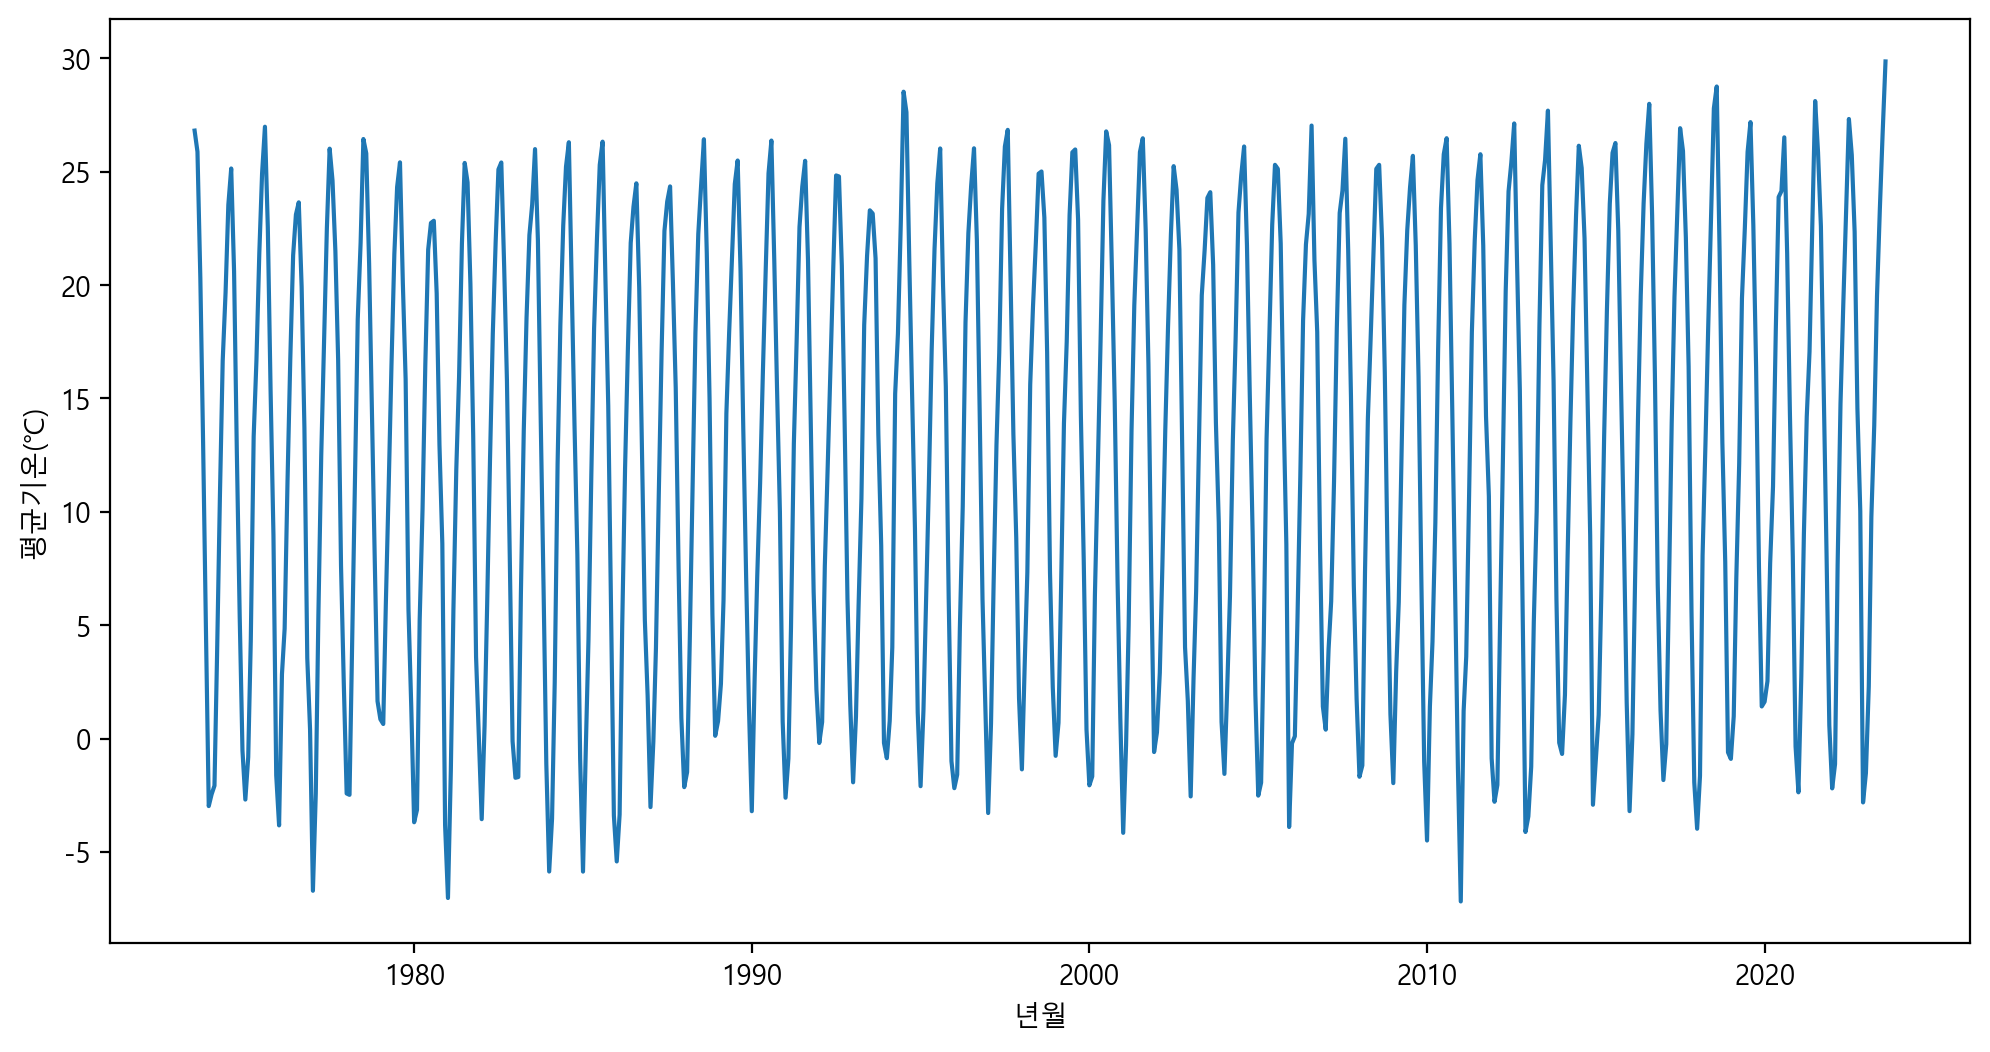

In [35]:
plt.figure(figsize = (12, 6))
sb.lineplot(x = df1_2.index, y = df1_2['평균기온(℃)'])
plt.show()

In [36]:
cond1 = df1_2.index > pd.to_datetime(dt.date(2021, 8, 1))

In [37]:
df1_3 = df1_2[cond1]

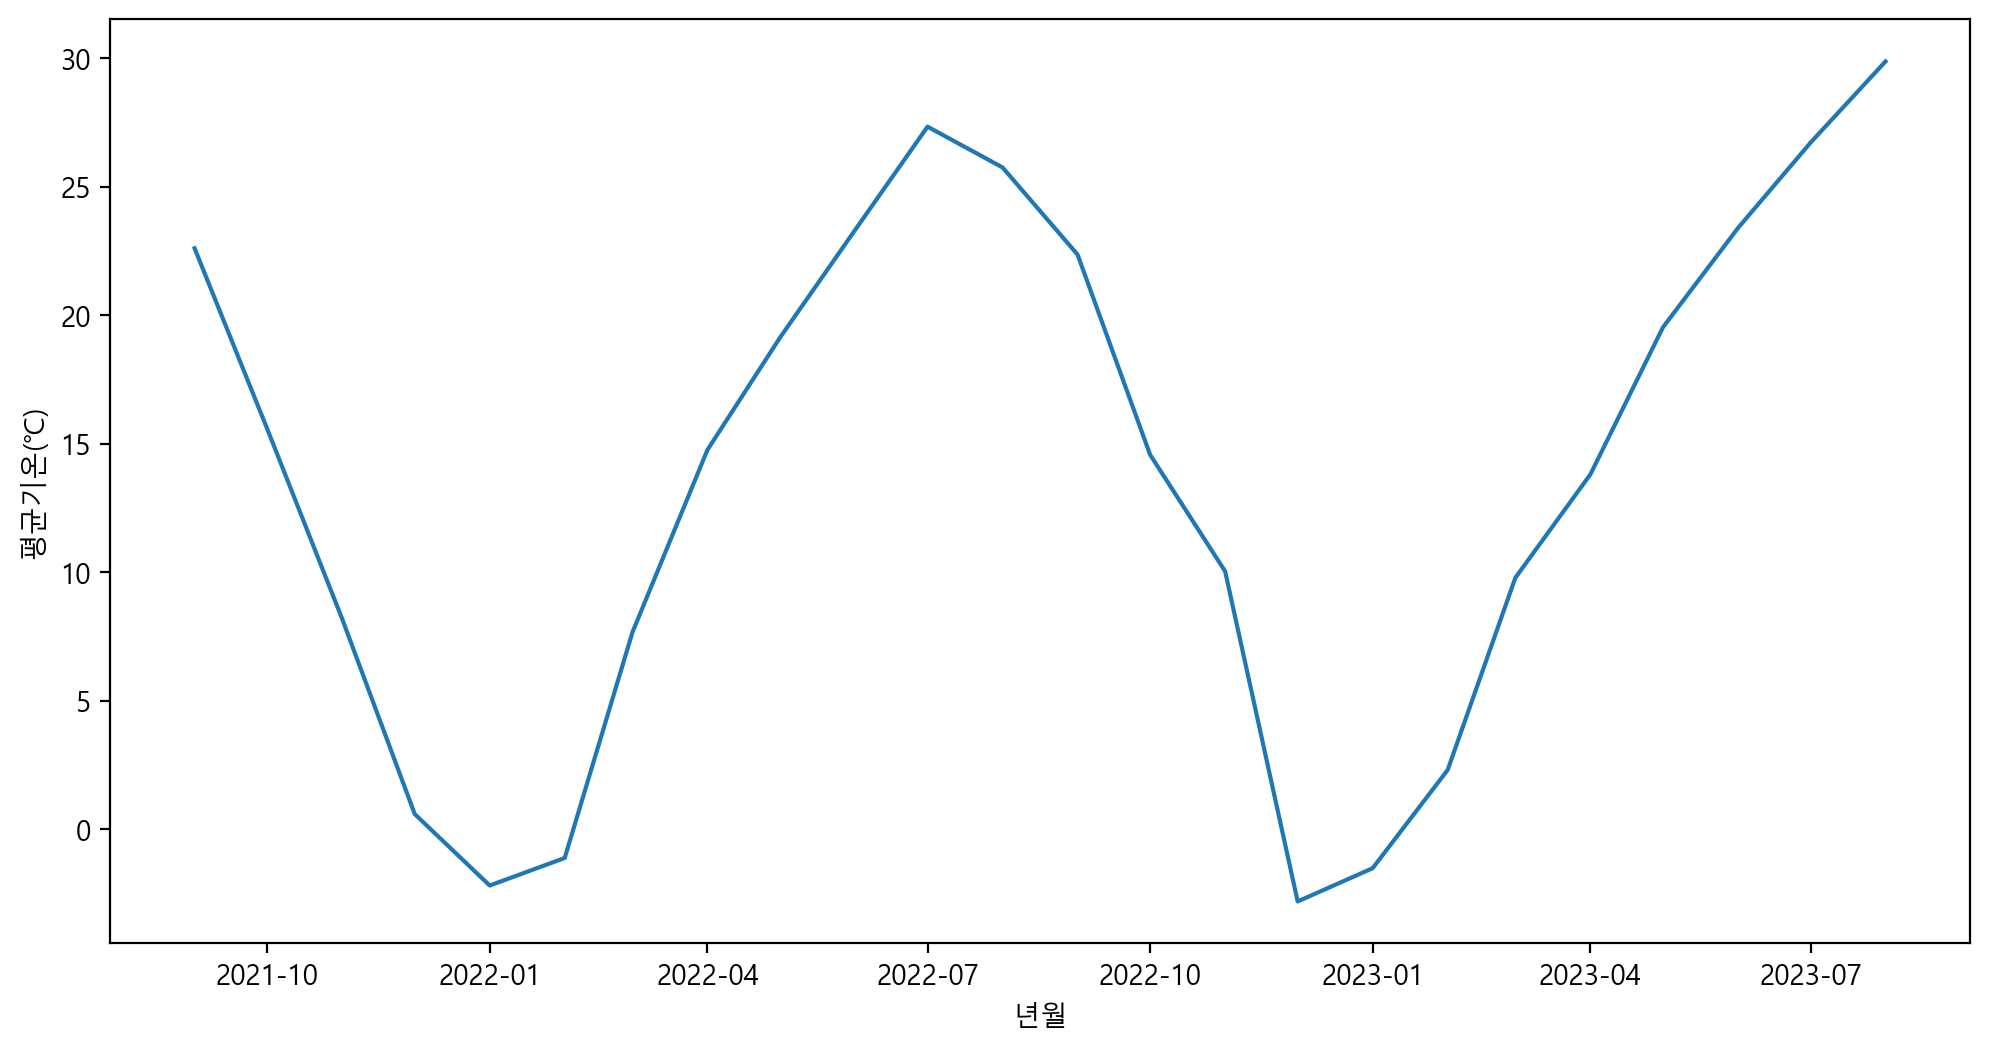

In [38]:
plt.figure(figsize = (12, 6))
sb.lineplot(x = df1_3.index, y = df1_3['평균기온(℃)'])
plt.show()

=========== 원본 데이터 ===========


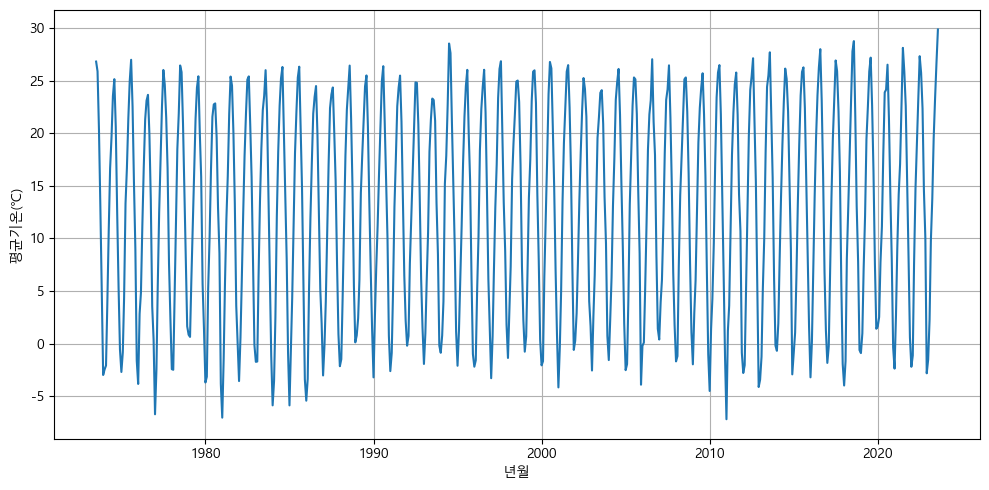

+----------------------------------+----------------------+
|                                  | ADF Test             |
|----------------------------------+----------------------|
| 검정통계량(ADF Statistic)        | -3.8774082014737856  |
| 유의수준(p-value)                | 0.002207546605727637 |
| 최적차수(num of lags)            | 14                   |
| 관측치 개수(num of observations) | 587                  |
| 기각값(Critical Values) 1%       | -3.4415393130846725  |
| 기각값(Critical Values) 5%       | -2.866476335860869   |
| 기각값(Critical Values) 10%      | -2.5693989358590006  |
| 데이터 정상성 여부               | 정상                 |
+----------------------------------+----------------------+


In [39]:
diff_df1 = my_diff(df1_2, '평균기온(℃)')

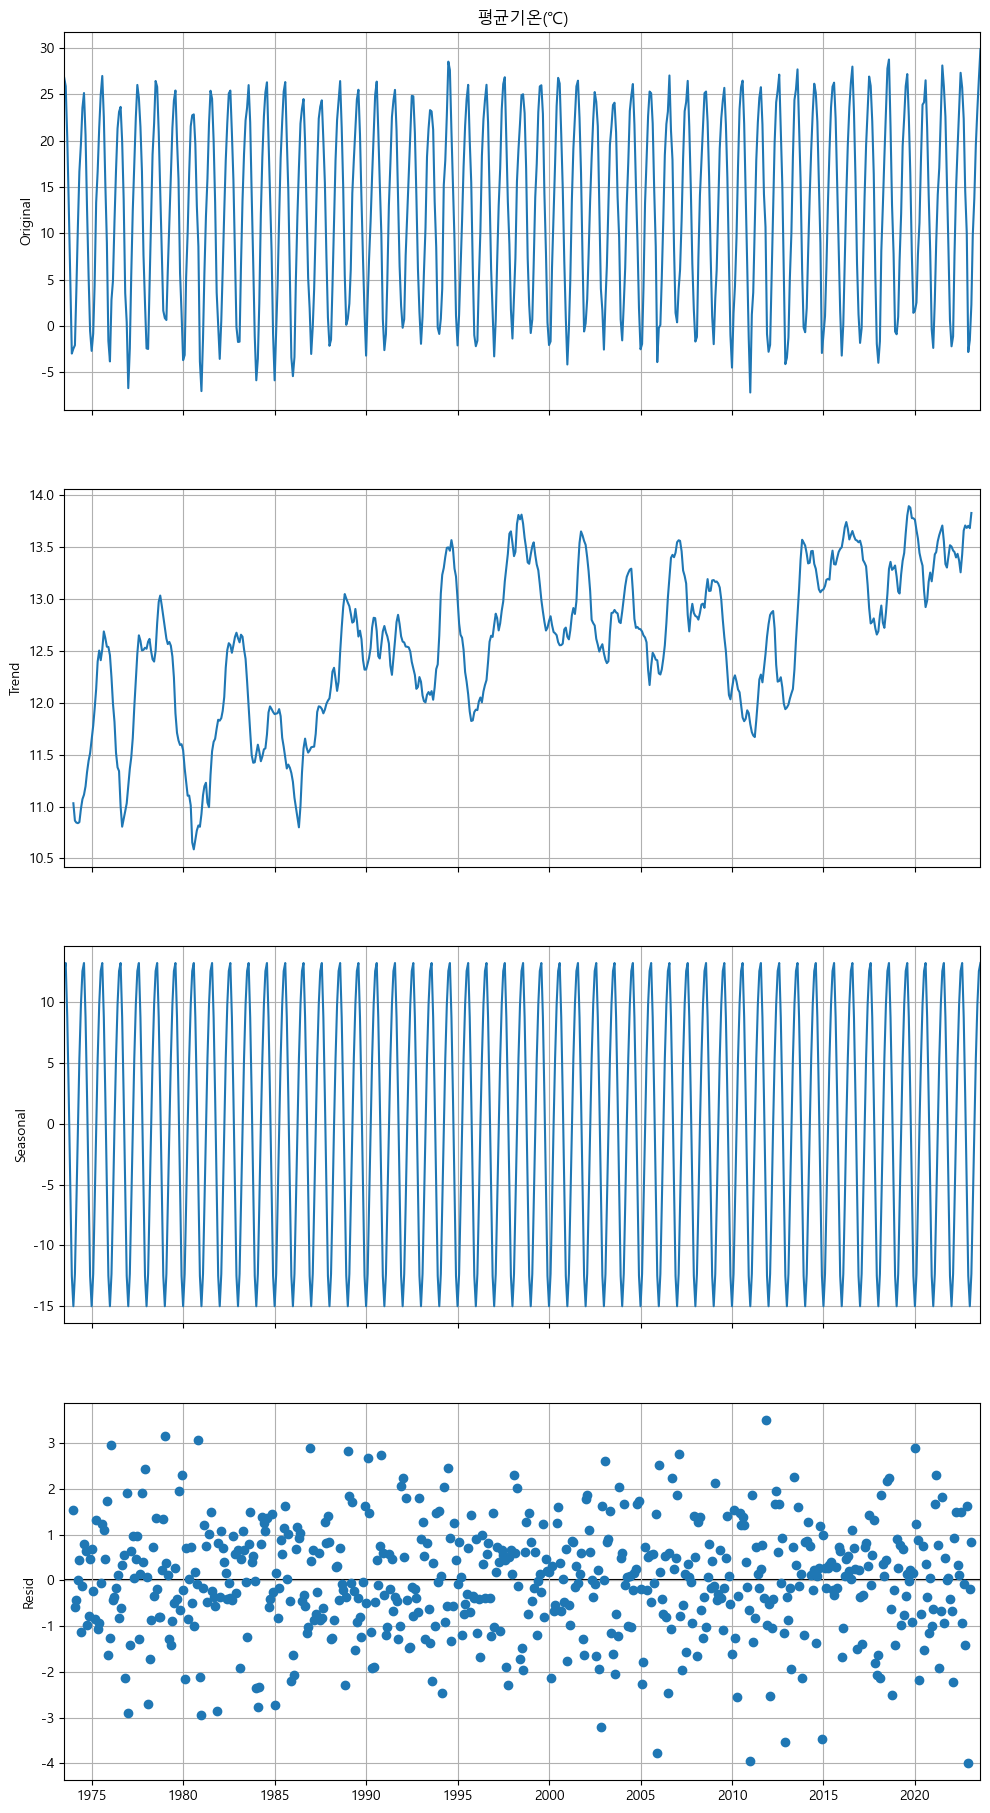

In [40]:
sd1 = my_seasonal_decompose(df1_2['평균기온(℃)'])

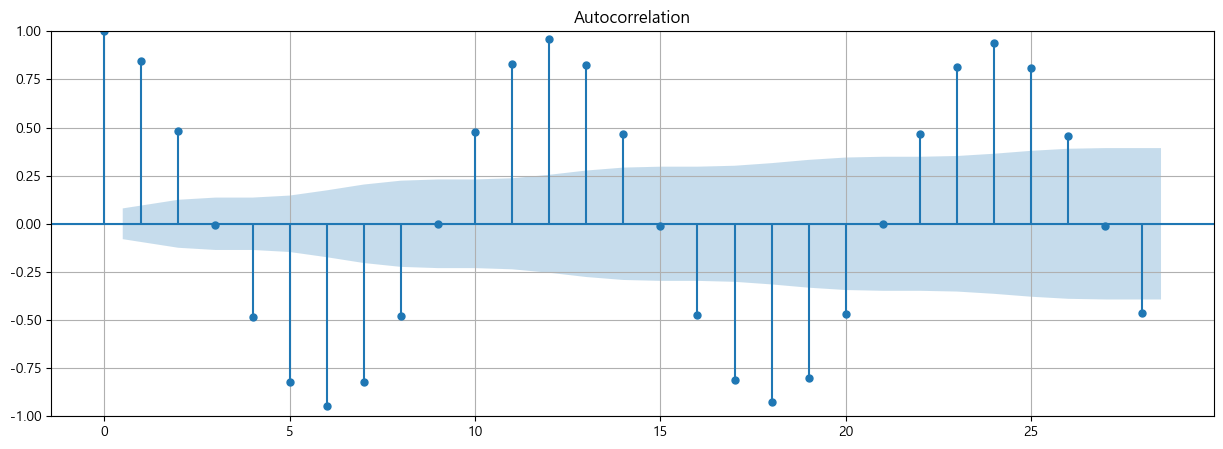

In [41]:
fig = plt.figure(figsize=(15, 5), dpi=100)
ax = fig.gca()

plot_acf(df1_2['평균기온(℃)'], ax=ax)

ax.grid()
plt.show()
plt.close()

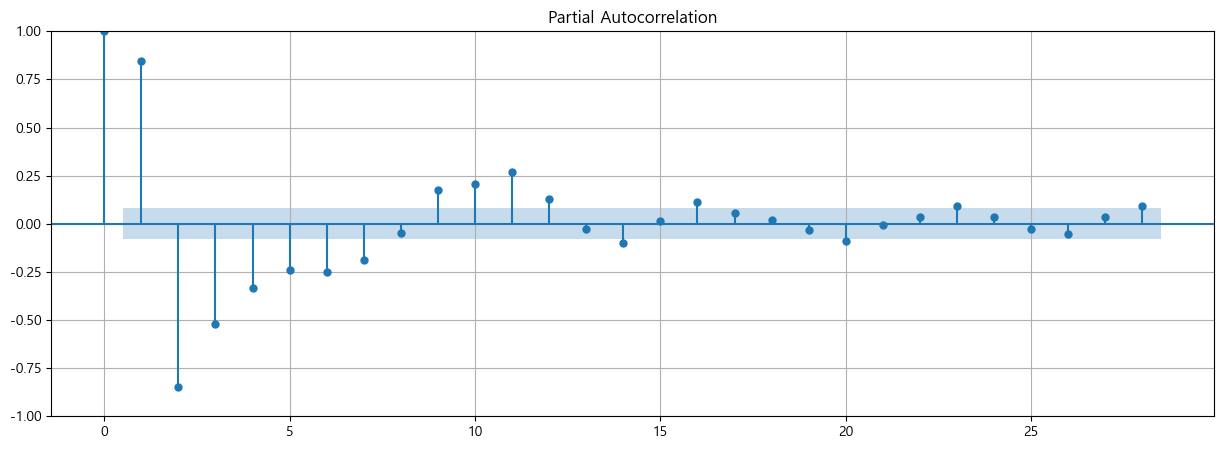

In [42]:
fig = plt.figure(figsize=(15, 5), dpi=100)
ax = fig.gca()

plot_pacf(df1_2['평균기온(℃)'], ax=ax)

ax.grid()
plt.show()
plt.close()

In [43]:
my_p = 1    # 적절히 넉넉히
my_d = 0    # 차분 횟수 (검증한 결과를 활용)
my_q = 1    # 적절히 넉넉히
my_s = 12  # 계절성 주기 (분석가가 판단)

model1 = auto_arima(
    y        = df1_2,          # 모델링하려는 시계열 데이터 또는 배열
    start_p  = 0,              # p의 시작점
    max_p    = my_p,           # p의 최대값
    d        = my_d,           # 차분 횟수
    start_q  = 0,              # q의 시작점
    max_q    = my_q,           # q의 최대값
    seasonal = True,           # 계절성 사용 여부
    m        = my_s,           # 계절성 주기
    start_P  = 0,              # P의 시작점
    max_P    = my_p,           # P의 최대값
    D        = my_d,           # 계절성 차분 횟수
    start_Q  = 0,              # Q의 시작점
    max_Q    = my_q,           # Q의 최대값
    trace    = True            # 학습 과정 표시 여부
)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=4475.546, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=3453.074, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=5052.366, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=3850.174, Time=0.11 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=2175.365, Time=1.19 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=2485.607, Time=0.63 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=2211.992, Time=1.14 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.67 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(0,0,1)(1,0,1)[12]             : AIC=2178.708, Time=0.90 sec

Best model:  ARIMA(0,0,1)(1,0,1)[12] intercept
Total fit time: 7.956 seconds


In [44]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  602
Model:             SARIMAX(0, 0, 1)x(1, 0, 1, 12)   Log Likelihood               -1082.683
Date:                            Tue, 12 Mar 2024   AIC                           2175.365
Time:                                    15:09:28   BIC                           2197.366
Sample:                                07-01-1973   HQIC                          2183.928
                                     - 08-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0085      0.004      2.003      0.045       0.000       0.017
ma.L1          0.2178      0.036      5.980      0.000       0.146       0.289
ar.S.L12       0.9993      0.000   2876.360      0.000       0.999       1.000
ma.S.L12      -0.8364      0.032    -26.181      0.000      -0.899      -0.774
sigma2         2.0386      0.111     18.327      0.000       1.821       2.257
===================================================================================
Ljung-Box (L1) (Q):                   1.72   Jarque-Bera (JB):                19.29
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.22
Prob(H) (two-sided):                  0.40   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
pred1 = model1.predict(n_periods = 12)
pred1.head()

2023-09-01    22.779691
2023-10-01    15.142589
2023-11-01     8.028979
2023-12-01    -0.502158
2024-01-01    -1.747567
Freq: MS, dtype: float64

In [49]:
cond1_2 = df1_2.index > pd.to_datetime(dt.date(2022, 8, 1))
df1_4 = df1_2[cond1_2]

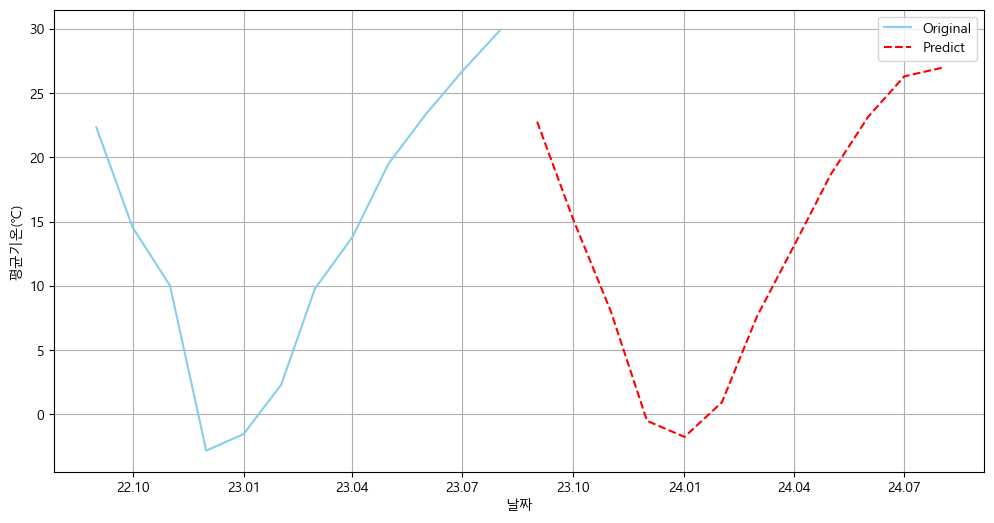

In [50]:
fig = plt.figure(figsize=(12,6), dpi=100)
ax = fig.gca()

sb.lineplot(data=df1_4, x=df1_4.index, y='평균기온(℃)', label='Original', color='skyblue', ax=ax)
sb.lineplot(x=pred1.index, y=pred1.values, label='Predict', linestyle='--', color='red', ax=ax)

ax.grid()
ax.set_xlabel('날짜')
ax.set_ylabel('평균기온(℃)')

# 그래프의 x축이 날짜로 구성되어 있을 경우 형식 지정
monthyearFmt = dates.DateFormatter('%y.%m')
ax.xaxis.set_major_formatter(monthyearFmt)

plt.show()
plt.close()

In [84]:
df2 = pd.read_excel("./data/born_baby.xlsx")

In [55]:
df2.head()

시점  서울특별시  부산광역시  대구광역시  인천광역시  광주광역시  대전광역시  울산광역시  세종특별자치시    경기도  \
0  2000년 01월  12866   3752   3057   3320   2159   1859   1479        0  13527   
1  2000년 02월  11797   3632   2698   3069   1916   1752   1388        0  12437   
2  2000년 03월  12453   3935   3057   3267   1893   1835   1524        0  13157   
3  2000년 04월  10782   3464   2753   2683   1773   1690   1360        0  11698   
4  2000년 05월  10817   3511   2785   2782   1698   1599   1311        0  11362   

    강원도  충청북도  충청남도  전라북도  전라남도  경상북도  경상남도  제주특별자치도  
0  1966  1903  2398  2547  2679  3362  3928      842  
1  1780  1722  2273  2296  2366  3221  3612      764  
2  1803  1805  2269  2384  2423  3292  3972      809  
3  1612  1647  2076  2054  2157  2968  3661      680  
4  1615  1652  1988  2041  2109  2973  3516      733

In [87]:
df2['시점'] = pd.to_datetime(df2['시점'], format = "%Y년 %m월")

In [88]:
df2.set_index('시점', inplace = True)
df2.index = pd.DatetimeIndex(df2.index)

In [89]:
df2['총합'] = df2.sum(axis = 1)

In [90]:
df2_1 = df2[['총합']]

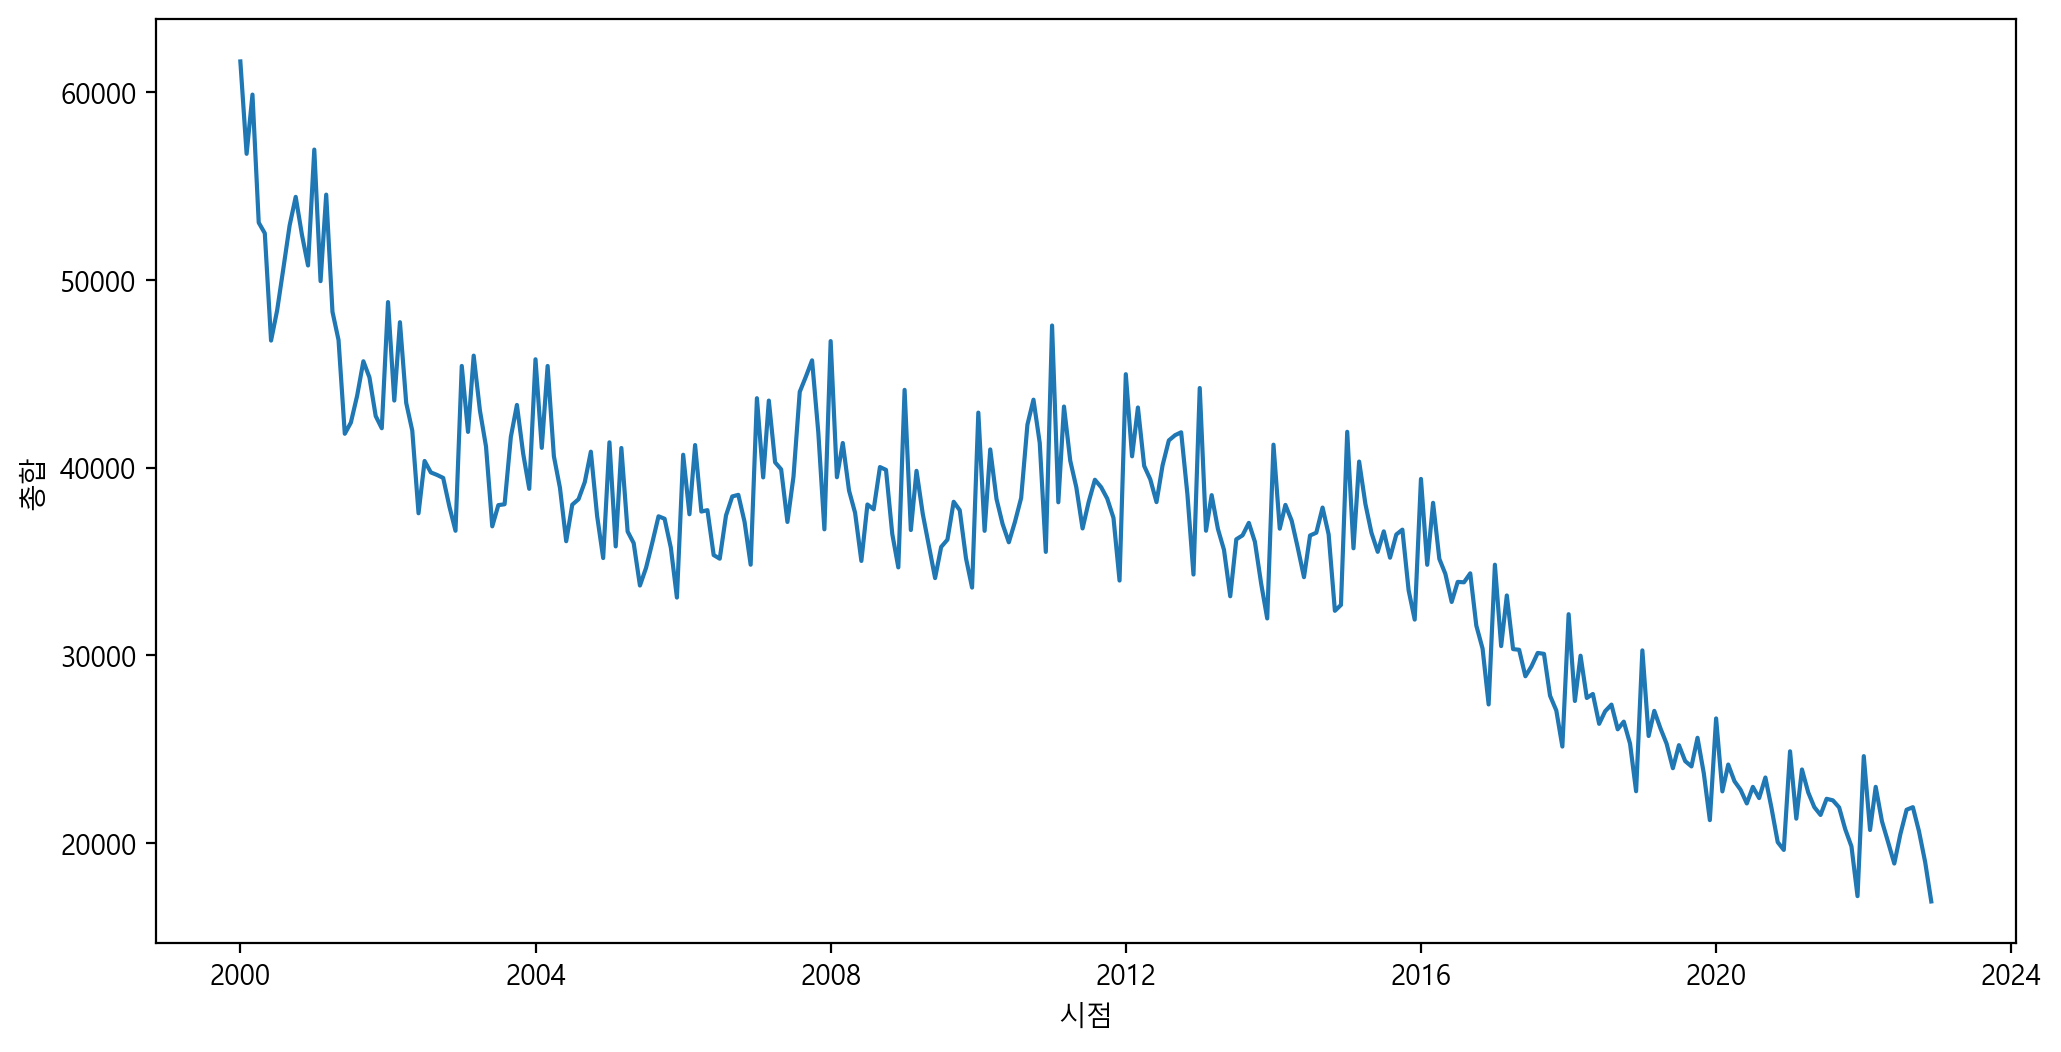

In [73]:
plt.figure(figsize = (12, 6))
sb.lineplot(x = df2_1.index, y = df2_1['총합'])
plt.show()

=========== 원본 데이터 ===========


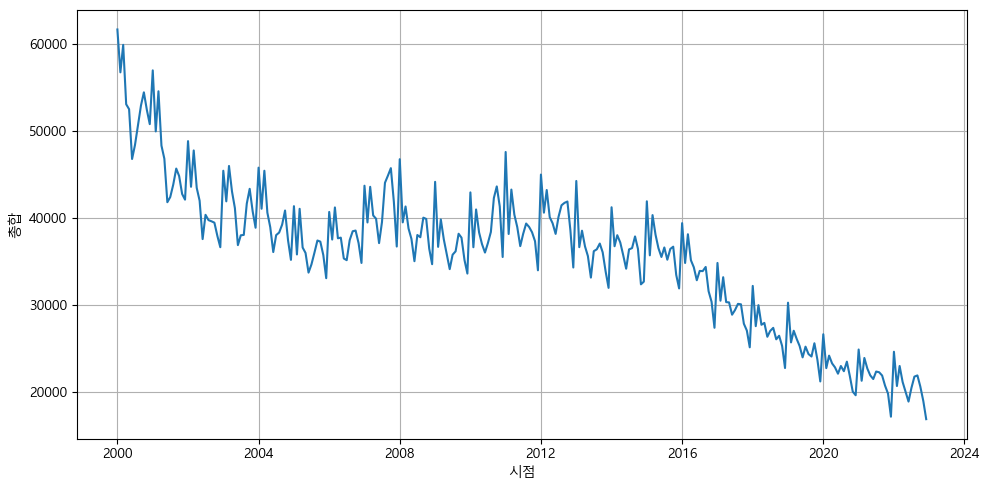

+----------------------------------+---------------------+
|                                  | ADF Test            |
|----------------------------------+---------------------|
| 검정통계량(ADF Statistic)        | -0.92115286137794   |
| 유의수준(p-value)                | 0.7809266912471358  |
| 최적차수(num of lags)            | 15                  |
| 관측치 개수(num of observations) | 260                 |
| 기각값(Critical Values) 1%       | -3.4557539868570775 |
| 기각값(Critical Values) 5%       | -2.8727214497041422 |
| 기각값(Critical Values) 10%      | -2.572728476331361  |
| 데이터 정상성 여부               | 비정상              |
+----------------------------------+---------------------+
=========== 1차 차분 데이터 ===========


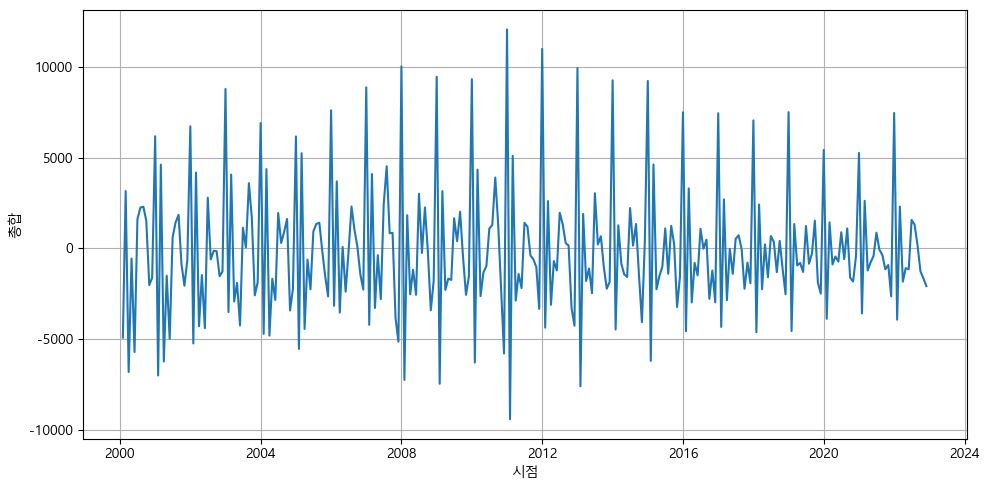

+----------------------------------+---------------------+
|                                  | ADF Test            |
|----------------------------------+---------------------|
| 검정통계량(ADF Statistic)        | -3.5640430738831177 |
| 유의수준(p-value)                | 0.00648684636643655 |
| 최적차수(num of lags)            | 16                  |
| 관측치 개수(num of observations) | 258                 |
| 기각값(Critical Values) 1%       | -3.455952927706342  |
| 기각값(Critical Values) 5%       | -2.8728086526320302 |
| 기각값(Critical Values) 10%      | -2.572774990685656  |
| 데이터 정상성 여부               | 정상                |
+----------------------------------+---------------------+


In [74]:
diff_df2 = my_diff(df2_1, '총합')

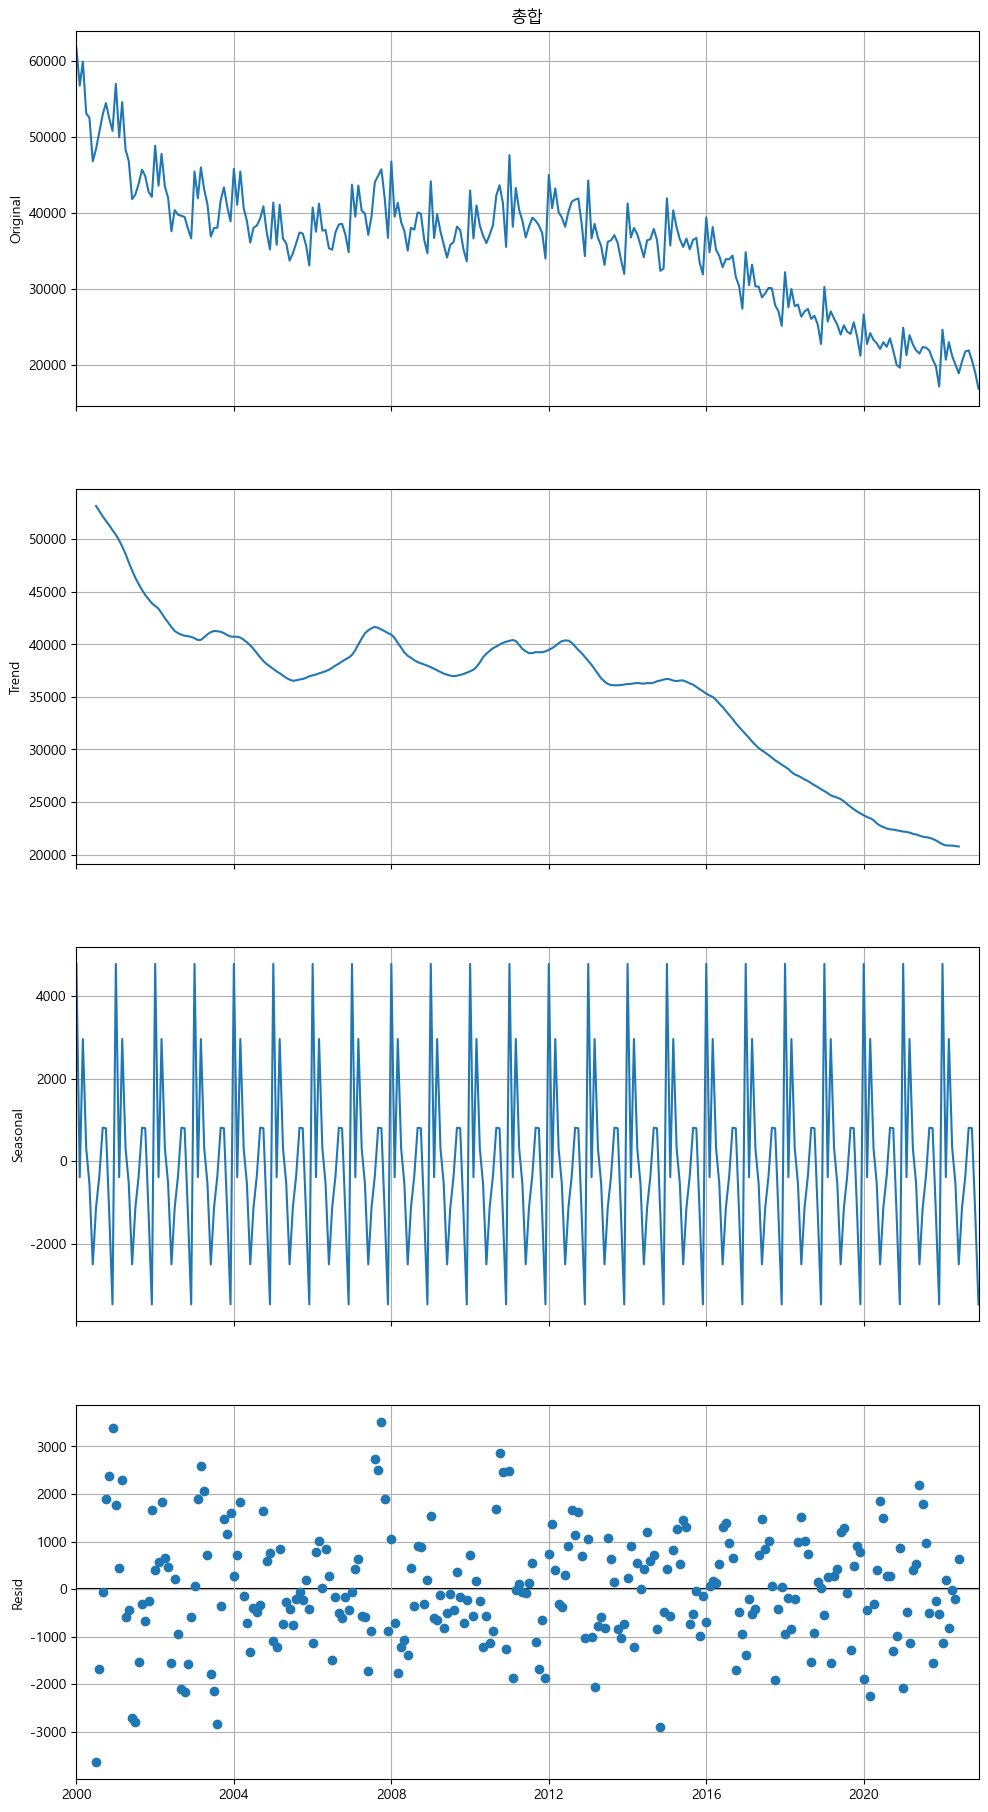

In [75]:
sd1 = my_seasonal_decompose(df2_1['총합'])

In [77]:
my_p = 2    # 적절히 넉넉히
my_d = 1    # 차분 횟수 (검증한 결과를 활용)
my_q = 2    # 적절히 넉넉히
my_s = 12  # 계절성 주기 (분석가가 판단)

model2 = auto_arima(
    y        = df2_1,          # 모델링하려는 시계열 데이터 또는 배열
    start_p  = 0,              # p의 시작점
    max_p    = my_p,           # p의 최대값
    d        = my_d,           # 차분 횟수
    start_q  = 0,              # q의 시작점
    max_q    = my_q,           # q의 최대값
    seasonal = True,           # 계절성 사용 여부
    m        = my_s,           # 계절성 주기
    start_P  = 0,              # P의 시작점
    max_P    = my_p,           # P의 최대값
    D        = my_d,           # 계절성 차분 횟수
    start_Q  = 0,              # Q의 시작점
    max_Q    = my_q,           # Q의 최대값
    trace    = True            # 학습 과정 표시 여부
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4547.222, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4537.779, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4531.202, Time=0.16 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=4549.040, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=4503.565, Time=0.51 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=4537.837, Time=0.11 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=4503.621, Time=1.14 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=4503.256, Time=1.49 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=4509.535, Time=0.47 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=inf, Time=2.00 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=4501.992, Time=0.45 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=4502.728, Time=0.52 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=4501.654, Time=0.21 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=4530.082, Time=0.11 sec
 ARIMA(0,1,0)(1,1,0)[12]

In [78]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  276
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood               -2247.827
Date:                              Tue, 12 Mar 2024   AIC                           4501.654
Time:                                      15:40:56   BIC                           4512.370
Sample:                                  01-01-2000   HQIC                          4505.960
                                       - 12-01-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5292      0.045     11.815      0.000       0.441       0.617
ma.S.L12      -0.8807      0.050    -17.488      0.000      -0.979      -0.782
sigma2      1.459e+06   1.08e+05     13.555      0.000    1.25e+06    1.67e+06
===================================================================================
Ljung-Box (L1) (Q):                   8.12   Jarque-Bera (JB):                12.34
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                            -0.35
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:
pred2 = model2.predict(n_periods = 60)
pred2.head()

2023-01-01    24594.570683
2023-02-01    20321.875862
2023-03-01    22770.326741
2023-04-01    20799.849451
2023-05-01    19815.394295
Freq: MS, dtype: float64

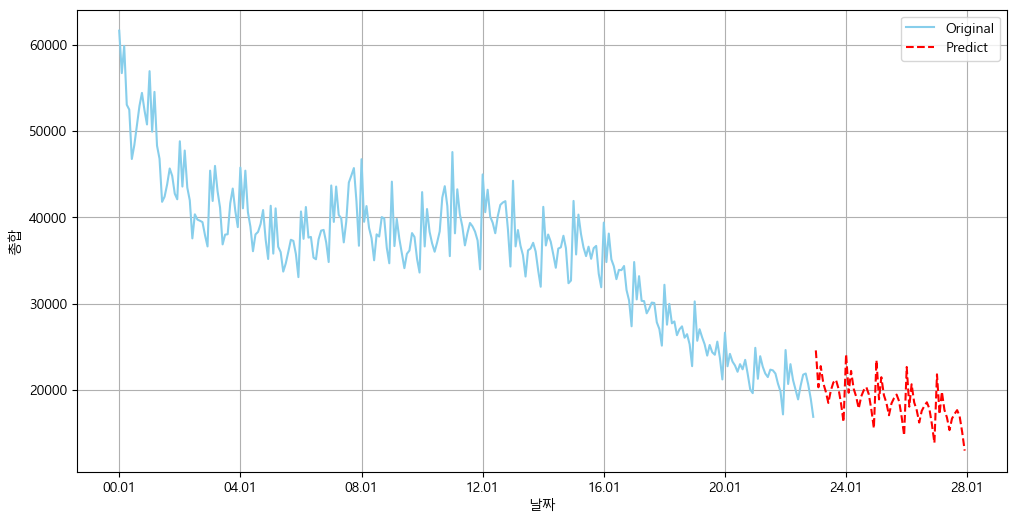

In [82]:
fig = plt.figure(figsize=(12,6), dpi=100)
ax = fig.gca()

sb.lineplot(data=df2_1, x=df2_1.index, y='총합', label='Original', color='skyblue', ax=ax)
sb.lineplot(x=pred2.index, y=pred2.values, label='Predict', linestyle='--', color='red', ax=ax)

ax.grid()
ax.set_xlabel('날짜')
ax.set_ylabel('총합')

# 그래프의 x축이 날짜로 구성되어 있을 경우 형식 지정
monthyearFmt = dates.DateFormatter('%y.%m')
ax.xaxis.set_major_formatter(monthyearFmt)

plt.show()
plt.close()

In [92]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [93]:
df3 = pd.read_excel("./data/air_passengers.xlsx")

In [96]:
df3 = df3.rename(columns={'Month': 'ds', 'Passengers': 'y'})
df3.head()

ds    y
0 1949-01-01  112
1 1949-02-01  118
2 1949-03-01  132
3 1949-04-01  129
4 1949-05-01  121

In [100]:
m = Prophet()
m.fit(df3)

16:47:10 - cmdstanpy - INFO - Chain [1] start processing
16:47:10 - cmdstanpy - INFO - Chain [1] done processing


In [102]:
future = m.make_future_dataframe(periods=365, freq='D')
forecast = m.predict(future)
forecast.head()

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 1949-01-01  106.662426   56.900239  114.293570   106.662426   106.662426   
1 1949-02-01  108.835452   48.324345  106.552271   108.835452   108.835452   
2 1949-03-01  110.798186   82.083621  140.511491   110.798186   110.798186   
3 1949-04-01  112.971212   80.691838  137.791473   112.971212   112.971212   
4 1949-05-01  115.074141   82.366901  140.953970   115.074141   115.074141   

   additive_terms  additive_terms_lower  additive_terms_upper     yearly  \
0      -21.848267            -21.848267            -21.848267 -21.848267   
1      -30.607522            -30.607522            -30.607522 -30.607522   
2       -0.455949             -0.455949             -0.455949  -0.455949   
3       -5.160494             -5.160494             -5.160494  -5.160494   
4       -3.807887             -3.807887             -3.807887  -3.807887   

   yearly_lower  yearly_upper  multiplicative_terms  \
0    -21.848267    -21.848267                   0.0   
1    -30.607522    -30.607522                   0.0   
2     -0.455949     -0.455949                   0.0   
3     -5.160494     -5.160494                   0.0   
4     -3.807887     -3.807887                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper        yhat  
0                         0.0                         0.0   84.814159  
1                         0.0                         0.0   78.227931  
2                         0.0                         0.0  110.342237  
3                         0.0                         0.0  107.810718  
4                         0.0                         0.0  111.266255

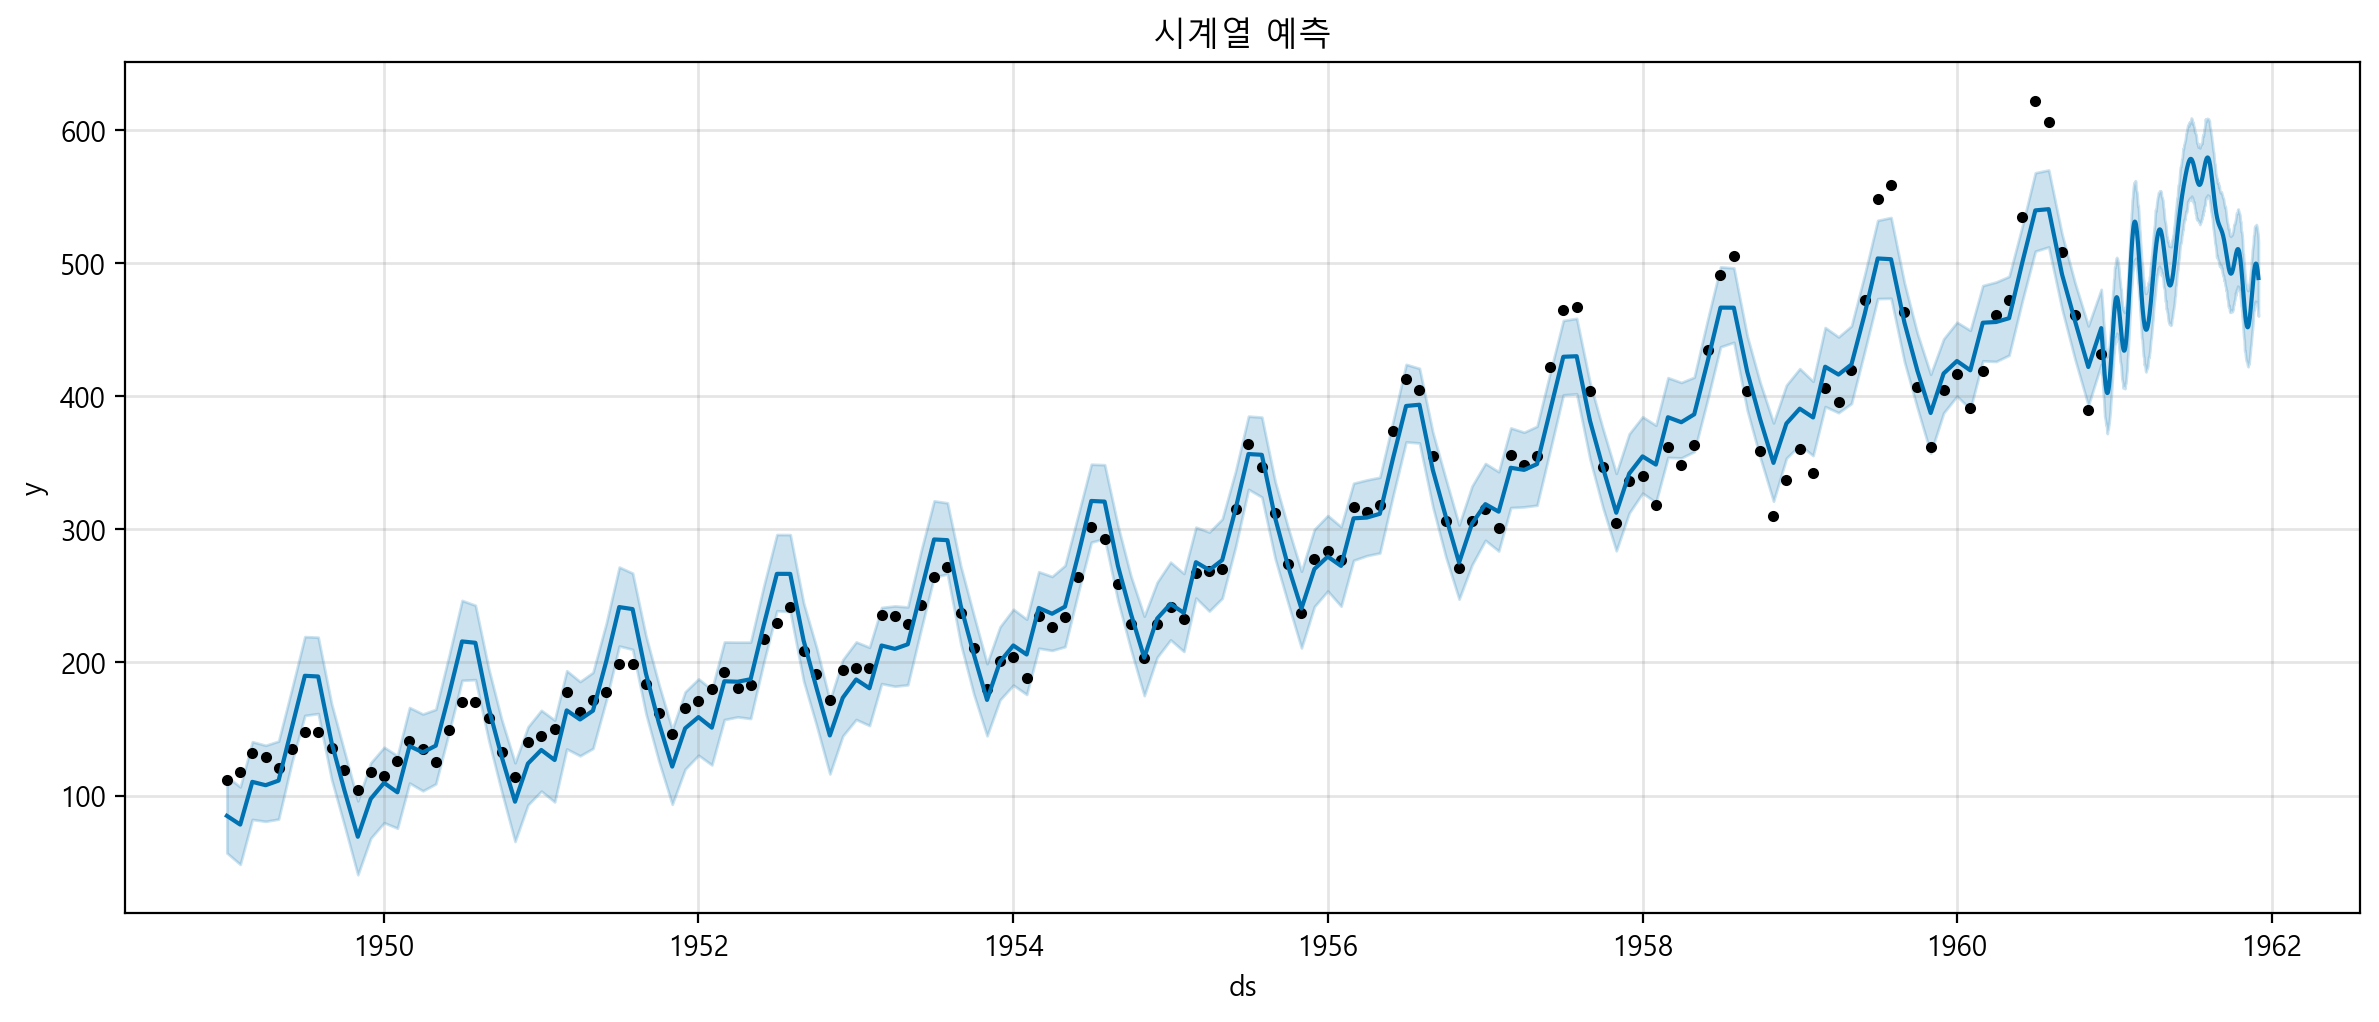

In [104]:
fig = m.plot(forecast, figsize=(12, 5))
ax = fig.gca()
ax.set_title("시계열 예측")
plt.show()
plt.close()

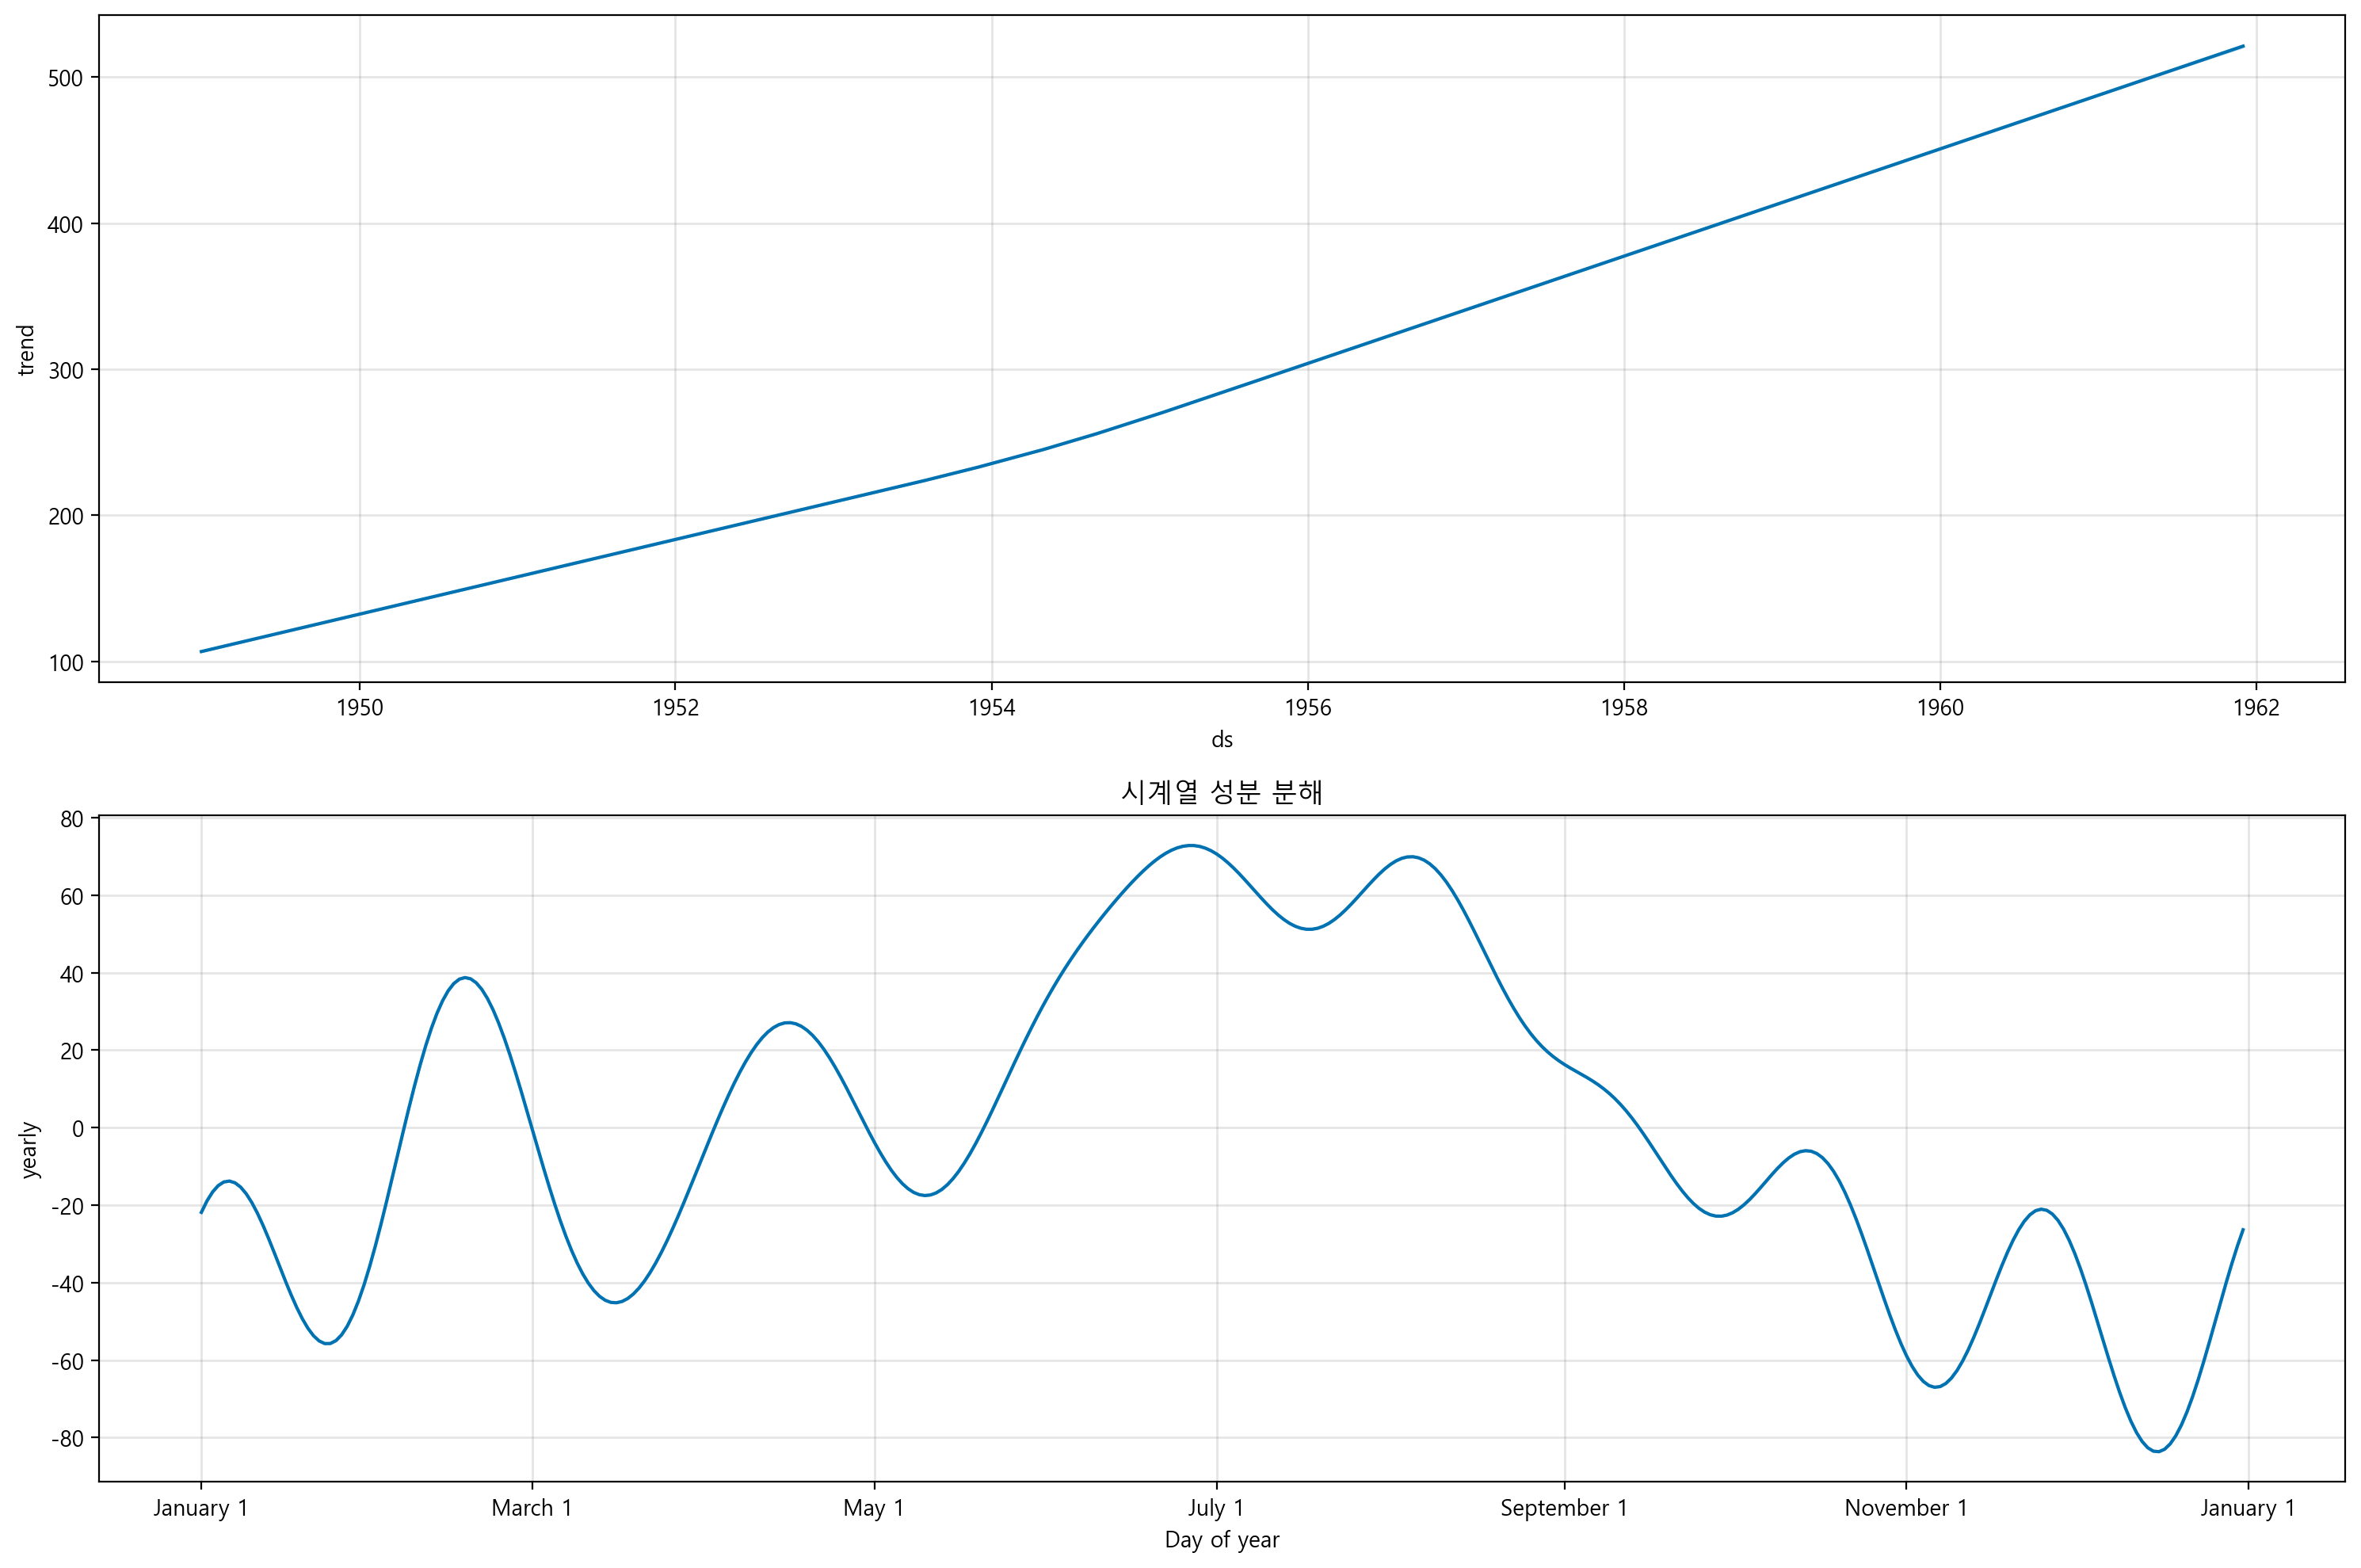

In [108]:
fig = m.plot_components(forecast, figsize=(15, 10))
fig.subplots_adjust(hspace = 0.2)
ax = fig.gca()
ax.set_title("시계열 성분 분해")
plt.show()
plt.close()

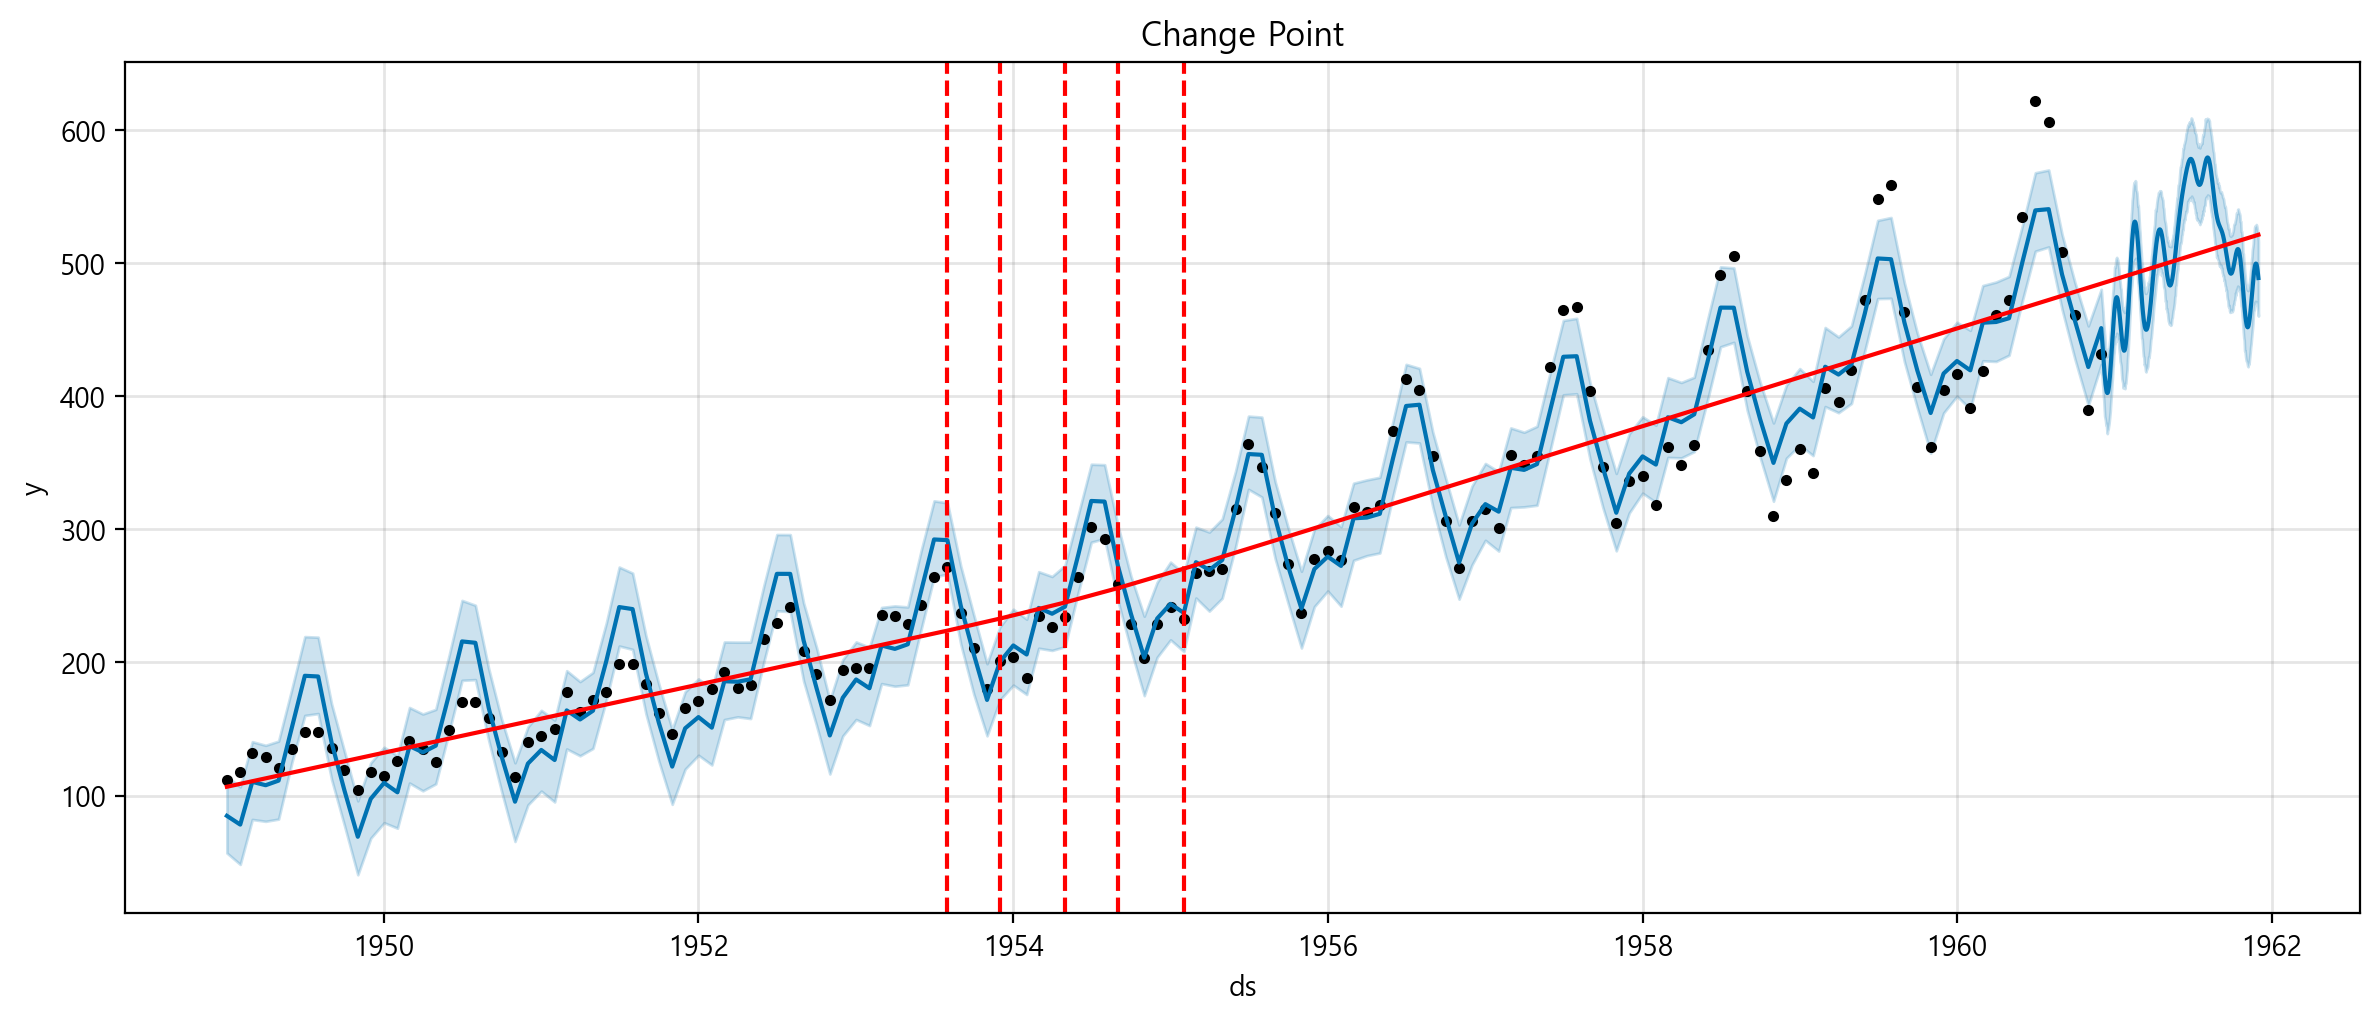

In [109]:
fig = m.plot(forecast, figsize=(12, 5))
ax = fig.gca()
add_changepoints_to_plot(ax, m, forecast)

ax.set_title("Change Point")
plt.show()
plt.close()